## Importing required packages

In [1]:
library(Seurat)
library(RCurl)
library(cowplot)
library(tidyverse)
library(ggplot2)
library(clustree)
library(gridExtra)
library(grid)

# Set seed
set.seed(123456)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete()  masks RCurl::complete()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry



Attaching package: ‘gridExtra’


The following object is masked from

## Loading required files

In [2]:
# load trimmed data from previous script
user_file_dir_trimmed = readline(prompt = "Please enter file directory to NOVOall_SRAT_TRIMMED: ")
NOVOall_SRAT_TRIMMED = readRDS(user_file_dir_trimmed)

Please enter file directory to NOVOall_SRAT_TRIMMED:  ../data_files/NOVOall_SRAT_TRIMMED.rds


The following code chunk can be run only after the rest of the script has been run. 

In [3]:
# load normalised and scaled data 
user_dir1 = readline(prompt = "Please enter the file directory to load LOG_NORM_NOVOALL_filt: ")
LOG_NORM_NOVOALL_filt = readRDS(user_dir1)

# load after-PCA data 
user_dir2 = readline(prompt = "Please enter the file directory to load LOG_NORM_NOVOALL_filt_PCA: ")
LOG_NORM_NOVOALL_filt_PCA = readRDS(user_dir2)

# load after-findneighbours
user_dir3 = readline(prompt = "Please enter file directory to load LOG_NORM_NOVOALL_filt_neigh: ") # add .rds extension
LOG_NORM_NOVOALL_filt_neigh = readRDS(user_dir3)

# load after findclusters
user_dir4 = readline(prompt = "Please enter file directory to load LOG_NORM_NOVOALL_filt_clust: ") # add .rds extension
LOG_NORM_NOVOALL_filt_clust = readRDS(user_dir4)

# load after umap 
user_dir5 = readline(prompt = "Please enter file directory to load LOG_NORM_NOVOALL_filt_umap: ")
LOG_NORM_NOVOALL_filt_umap = readRDS(user_dir5)

Please enter the file directory to load LOG_NORM_NOVOALL_filt:  ../data_files/LOG_NORM_NOVOALL_filt.rds
Please enter the file directory to load LOG_NORM_NOVOALL_filt_PCA:  ../data_files/LOG_NORM_NOVOALL_filt_PCA.rds
Please enter file directory to load LOG_NORM_NOVOALL_filt_neigh:  ../data_files/LOG_NORM_NOVOALL_filt_neigh.rds
Please enter file directory to load LOG_NORM_NOVOALL_filt_clust:  ../data_files/LOG_NORM_NOVOALL_filt_clust.rds
Please enter file directory to load LOG_NORM_NOVOALL_filt_umap:  ../data_files/LOG_NORM_NOVOALL_filt_umap.rds


ERROR: Error: vector memory limit of 16.0 Gb reached, see mem.maxVSize()


## Normalisation using NormalizeData()
This is one of the normalization techniques, the other being SCTransform which is in a separate script.

In [3]:
# Log normalisation
LOG_NORM_NOVOALL_filt <- NormalizeData(NOVOall_SRAT_TRIMMED)

# identify the most variable genes
LOG_NORM_NOVOALL_filt <- FindVariableFeatures(LOG_NORM_NOVOALL_filt, 
                     selection.method = "vst",
                     nfeatures = 2000, 
                     verbose = FALSE)

# scale the counts 
LOG_NORM_NOVOALL_filt <- ScaleData(LOG_NORM_NOVOALL_filt)

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_WT_1.NOVO_WHOLE_WT

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_WT_2.NOVO_WHOLE_WT

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_WT_3.NOVO_WHOLE_WT

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_WT_4.NOVO_WHOLE_WT

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_C246X_1.NOVO_WHOLE_C246X

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_C246X_2.NOVO_WHOLE_C246X

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_C246X_3.NOVO_WHOLE_C246X

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_362del_1.NOVO_WHOLE_362DEL

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_362del_2.NOVO_WHOLE_362DEL

Normalizing layer: counts.NOVO_WHOLE_SAMPLE_362del_3.NOVO_WHOLE_362DEL

Centering and scaling data matrix



In [10]:
# save normalised and scaled data 
user_dir = readline(prompt = "Please enter the file directory to save LOG_NORM_NOVOALL_filt: ") # remember to add the .rds extension
saveRDS(LOG_NORM_NOVOALL_filt, file = user_dir) 

Please enter the file directory to save LOG_NORM_NOVOALL_filt:  ../data_files/LOG_NORM_NOVOALL_filt.rds


## Plot average expression and variance of 15 most highly variable genes

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 1557 rows containing missing values or values outside the scale range
(`geom_point()`).”


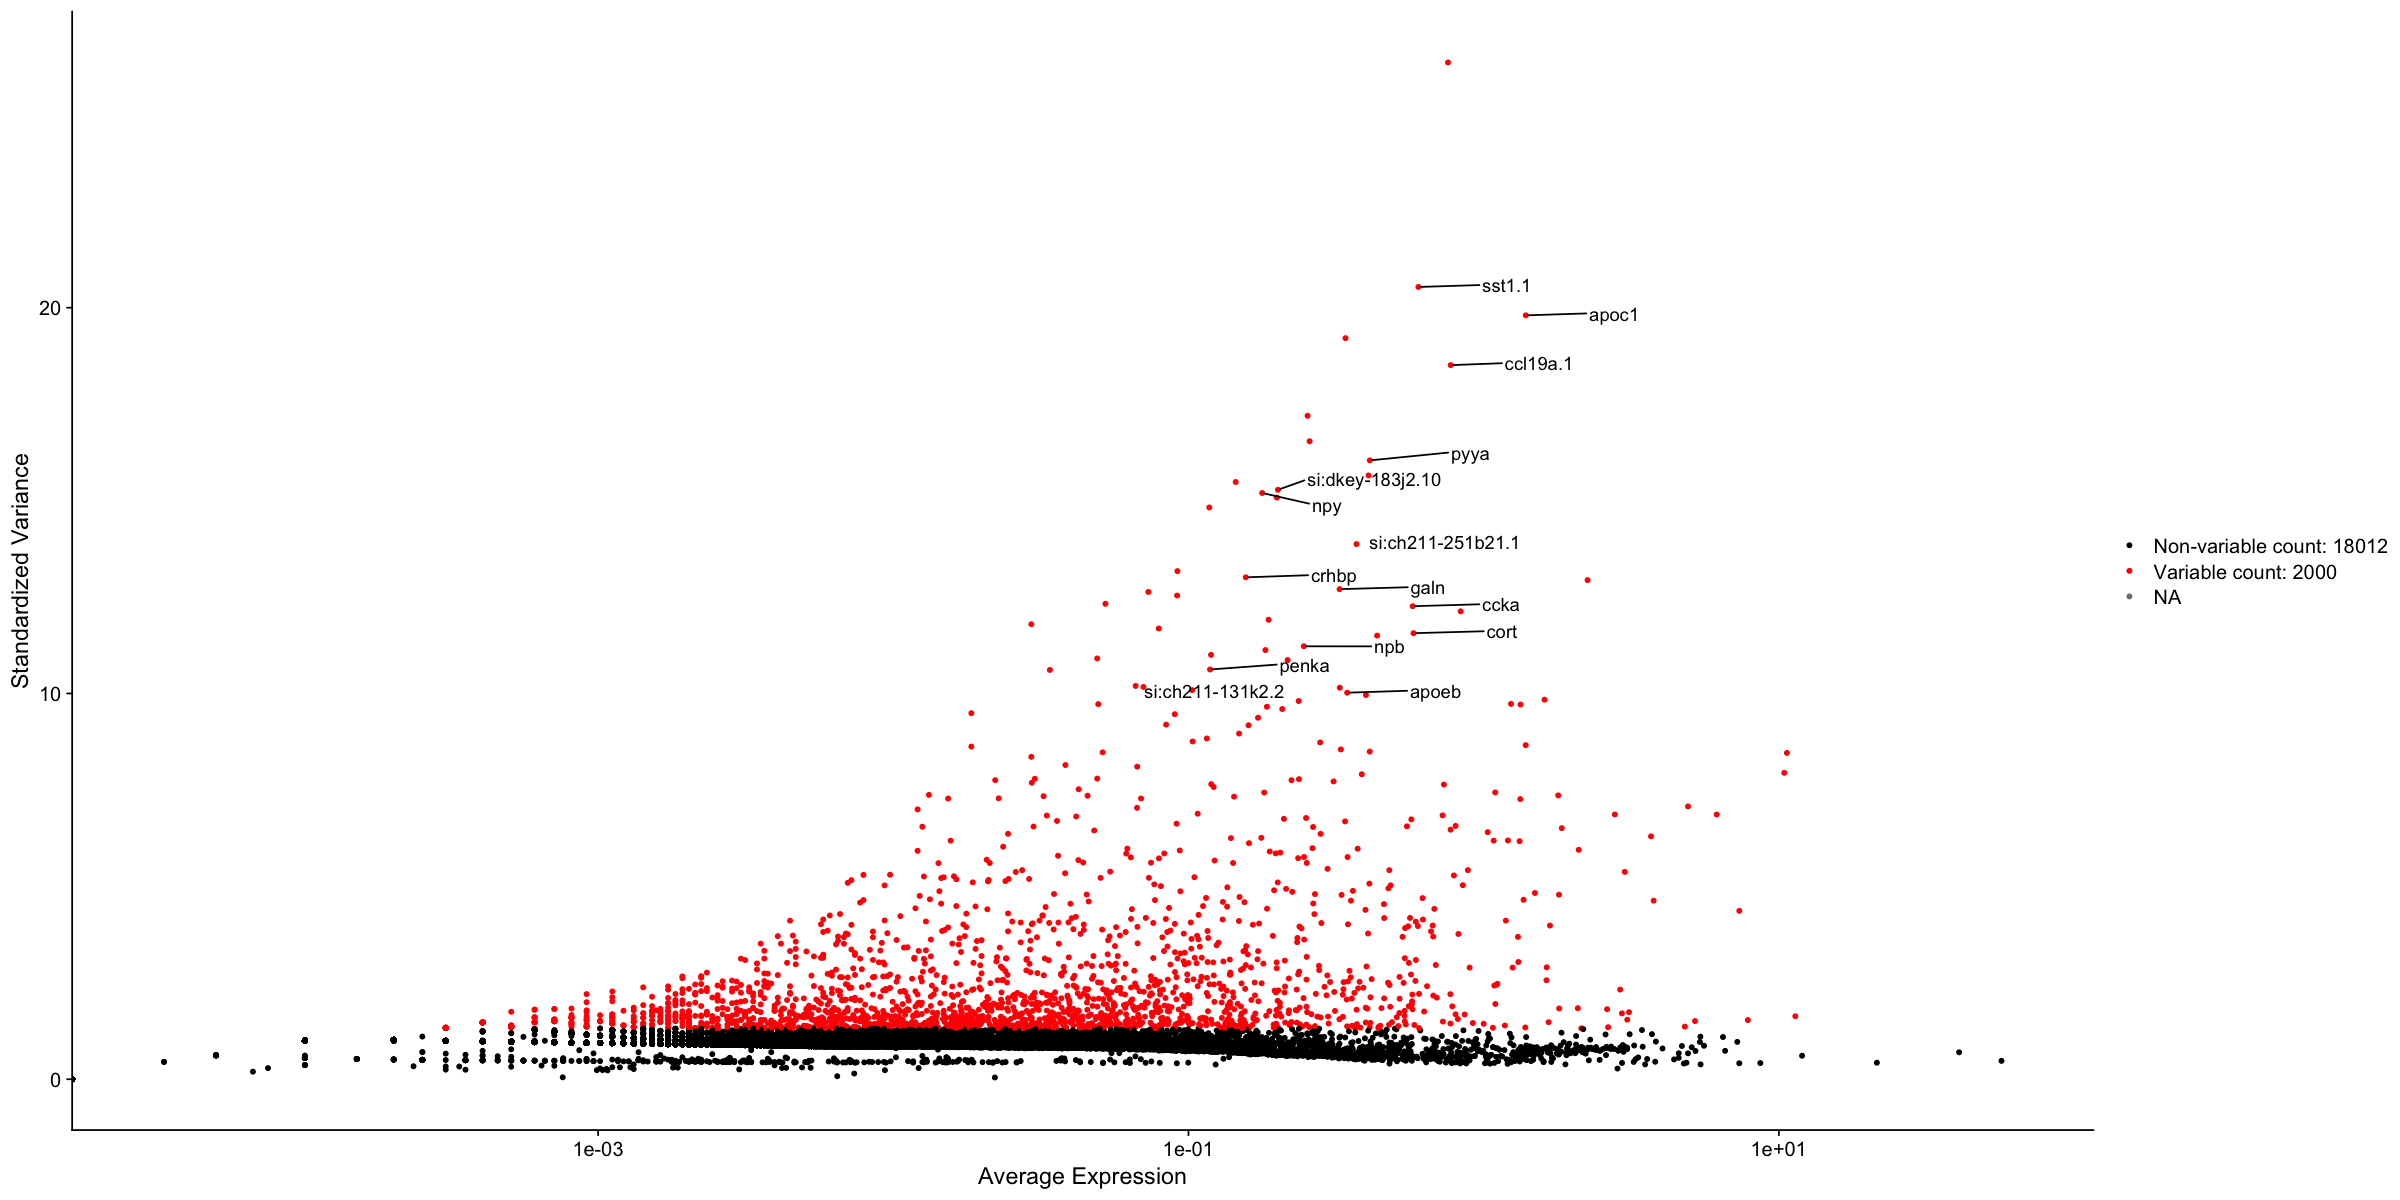

In [8]:
options(repr.plot.width=20, repr.plot.height=10)

# first identify 15 most highly variable genes
ranked_variable_genes <- VariableFeatures(LOG_NORM_NOVOALL_filt)
top_genes <- ranked_variable_genes[1:15]

# plot and add labels to indicate which genes are in the top 15
p <- VariableFeaturePlot(LOG_NORM_NOVOALL_filt)
LabelPoints(plot = p, points = top_genes, repel = TRUE)

## PCA plots

In [7]:
# Perform PCA (dimensionality reduction)

LOG_NORM_NOVOALL_filt_PCA <- RunPCA(LOG_NORM_NOVOALL_filt)

PC_ 1 
Positive:  cd74b, cd74a, mhc2a, ccl35.1, si:dkey-27i16.2, b2m, ctss2.2, spi1b, ctss2.1, fcer1gl 
	   cd63, zgc:64051, stoml3b, si:cabz01074946.1, srgn, pfn1, tspan36, lgals9l1, ifi30, ccl34b.1 
	   havcr1, lgals3bpb, arpc1b, mpeg1.1, si:ch211-212k18.7, slc7a7, cx32.2, anxa3b, apoc1, clic2 
Negative:  tmsb2, atp1b1b, zgc:122979, egr4, syt1a, scg2b, uchl1, elavl4, adgrb1b, gap43 
	   adcyap1b, nrn1a, itm2cb, phactr3b, snap25b, pcp4a, nrgna, dnajb4, bdnf, chga 
	   stmn4l, fosab, nell2b, rtn4rl2a, si:ch211-195b13.1, vgf, nptx1l, cplx2l, kctd4, mdkb 
PC_ 2 
Positive:  cx43, fgfbp3, atp1b4, slc4a4a, slc1a2b, atp1a1b, ptn, mfge8a, fabp7a, crtac1a 
	   mdka, s100b, hspb15, ppap2d, id1, cyp4t8, fgfr2, notch3, sparc, ptgdsb.2 
	   her4.1, s1pr1, ptgdsb.1, cebpd, aqp1a.1, gpm6bb, si:ch211-66e2.5, eno1b, glulb, gstp1 
Negative:  mhc2a, ccl35.1, si:dkey-27i16.2, cd74a, zgc:64051, ctss2.2, spi1b, cd74b, ctss2.1, arpc1b 
	   si:cabz01074946.1, mpeg1.1, fcer1gl, tmsb4x, pfn1, coro1a, grn1, lga

In [11]:
# save file 
user_dir2 = readline(prompt = "Please enter the file directory to save LOG_NORM_NOVOALL_filt_PCA: ") # remember to add the .rds extension
saveRDS(LOG_NORM_NOVOALL_filt_PCA, file = user_dir2) 

Please enter the file directory to save LOG_NORM_NOVOALL_filt_PCA:  ../data_files/LOG_NORM_NOVOALL_filt_PCA.rds


### Plot PCA for all genotypes together

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



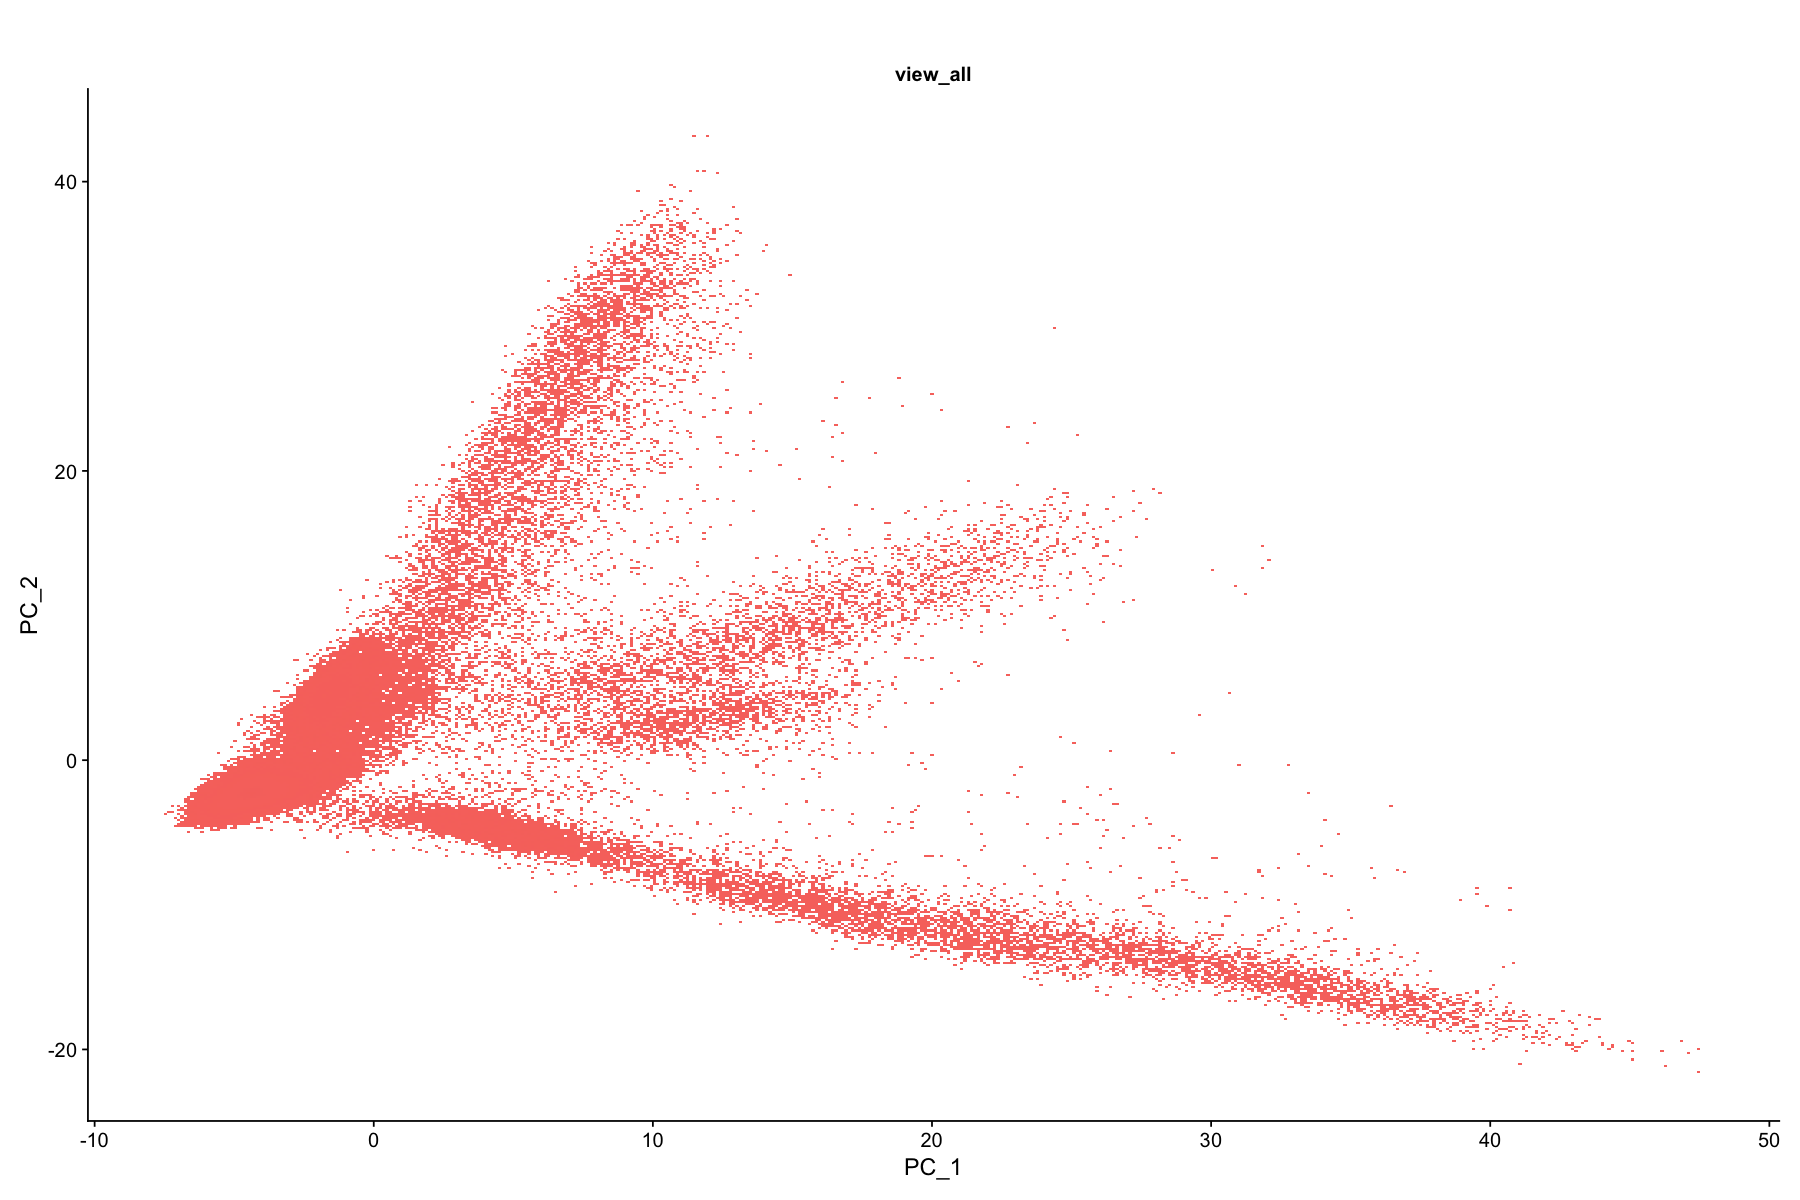

In [15]:
options(repr.plot.width=15, repr.plot.height=10)

# Plot PCA (note that each point on the plot is a cell)

DimPlot(LOG_NORM_NOVOALL_filt_PCA,
        reduction = "pca",
        group.by = "ALL",
        split.by = "ALL") + 
    NoLegend() + 
    labs(title = "")

### Check if cell distribution is similar for each genotype

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



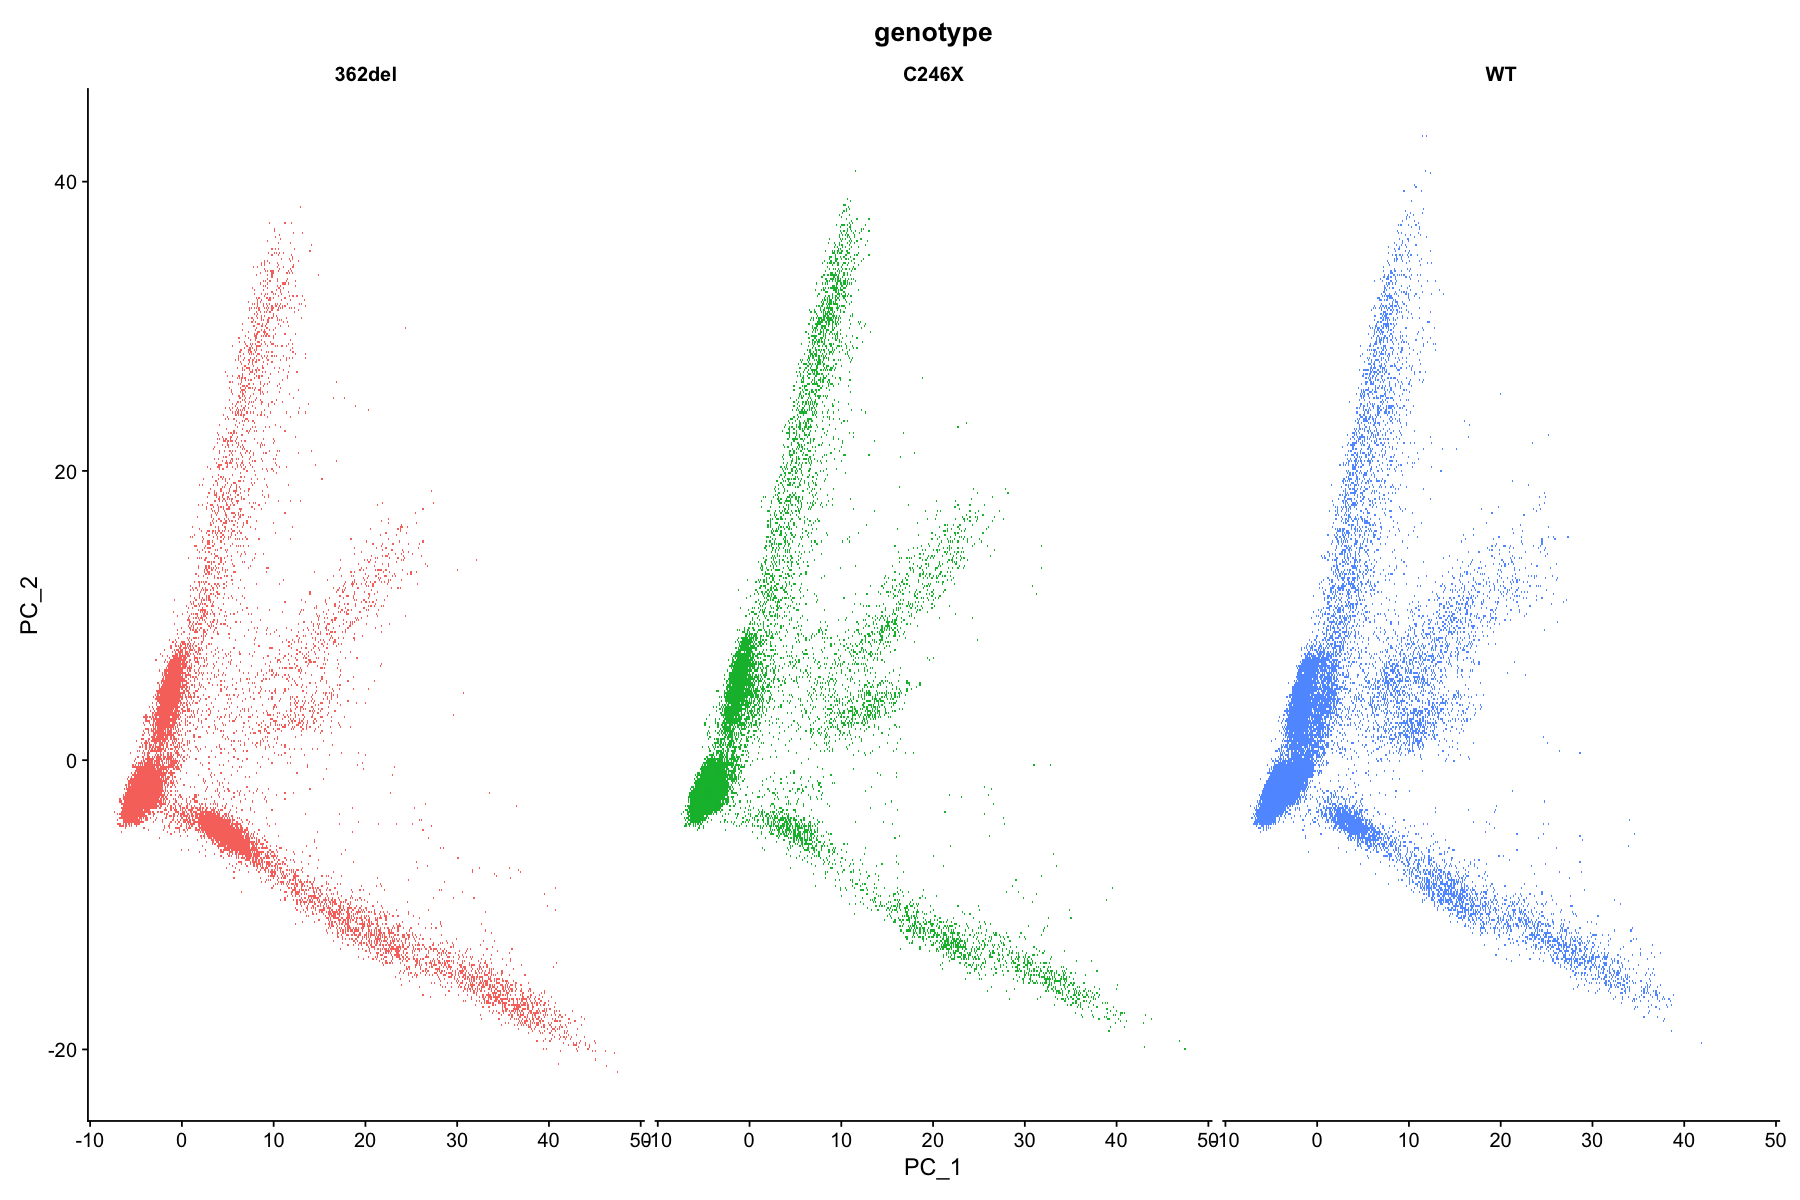

In [16]:
DimPlot(LOG_NORM_NOVOALL_filt_PCA,
        reduction = "pca",
        group.by = "genotype",
        split.by = "genotype") + 
    theme(legend.position = "none")

### Plotting PCA based on mitochondrial ratio 

In [18]:
# Evaluating mitochondrial expression

# Check quartile values
summary(LOG_NORM_NOVOALL_filt_PCA@meta.data$mitoRatio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01168 0.01753 0.02051 0.02605 0.07498 

In [19]:
# Turn mitoRatio into categorical factor vector based on quartile values - insert the summary quartile values into the 'breaks' line
LOG_NORM_NOVOALL_filt_PCA@meta.data$mitoFr <- cut(LOG_NORM_NOVOALL_filt_PCA@meta.data$mitoRatio, 
                   breaks=c(-Inf, 0.01168, 0.01753, 0.02605, Inf), 
                   labels=c("Low","Medium","Medium high", "High"))

Plot PCA based on mitochondrial ratio. If these plots look similar, then mitochondrial ratio isn't a major factor that will affect clustering and doesn't need to be regressed out.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



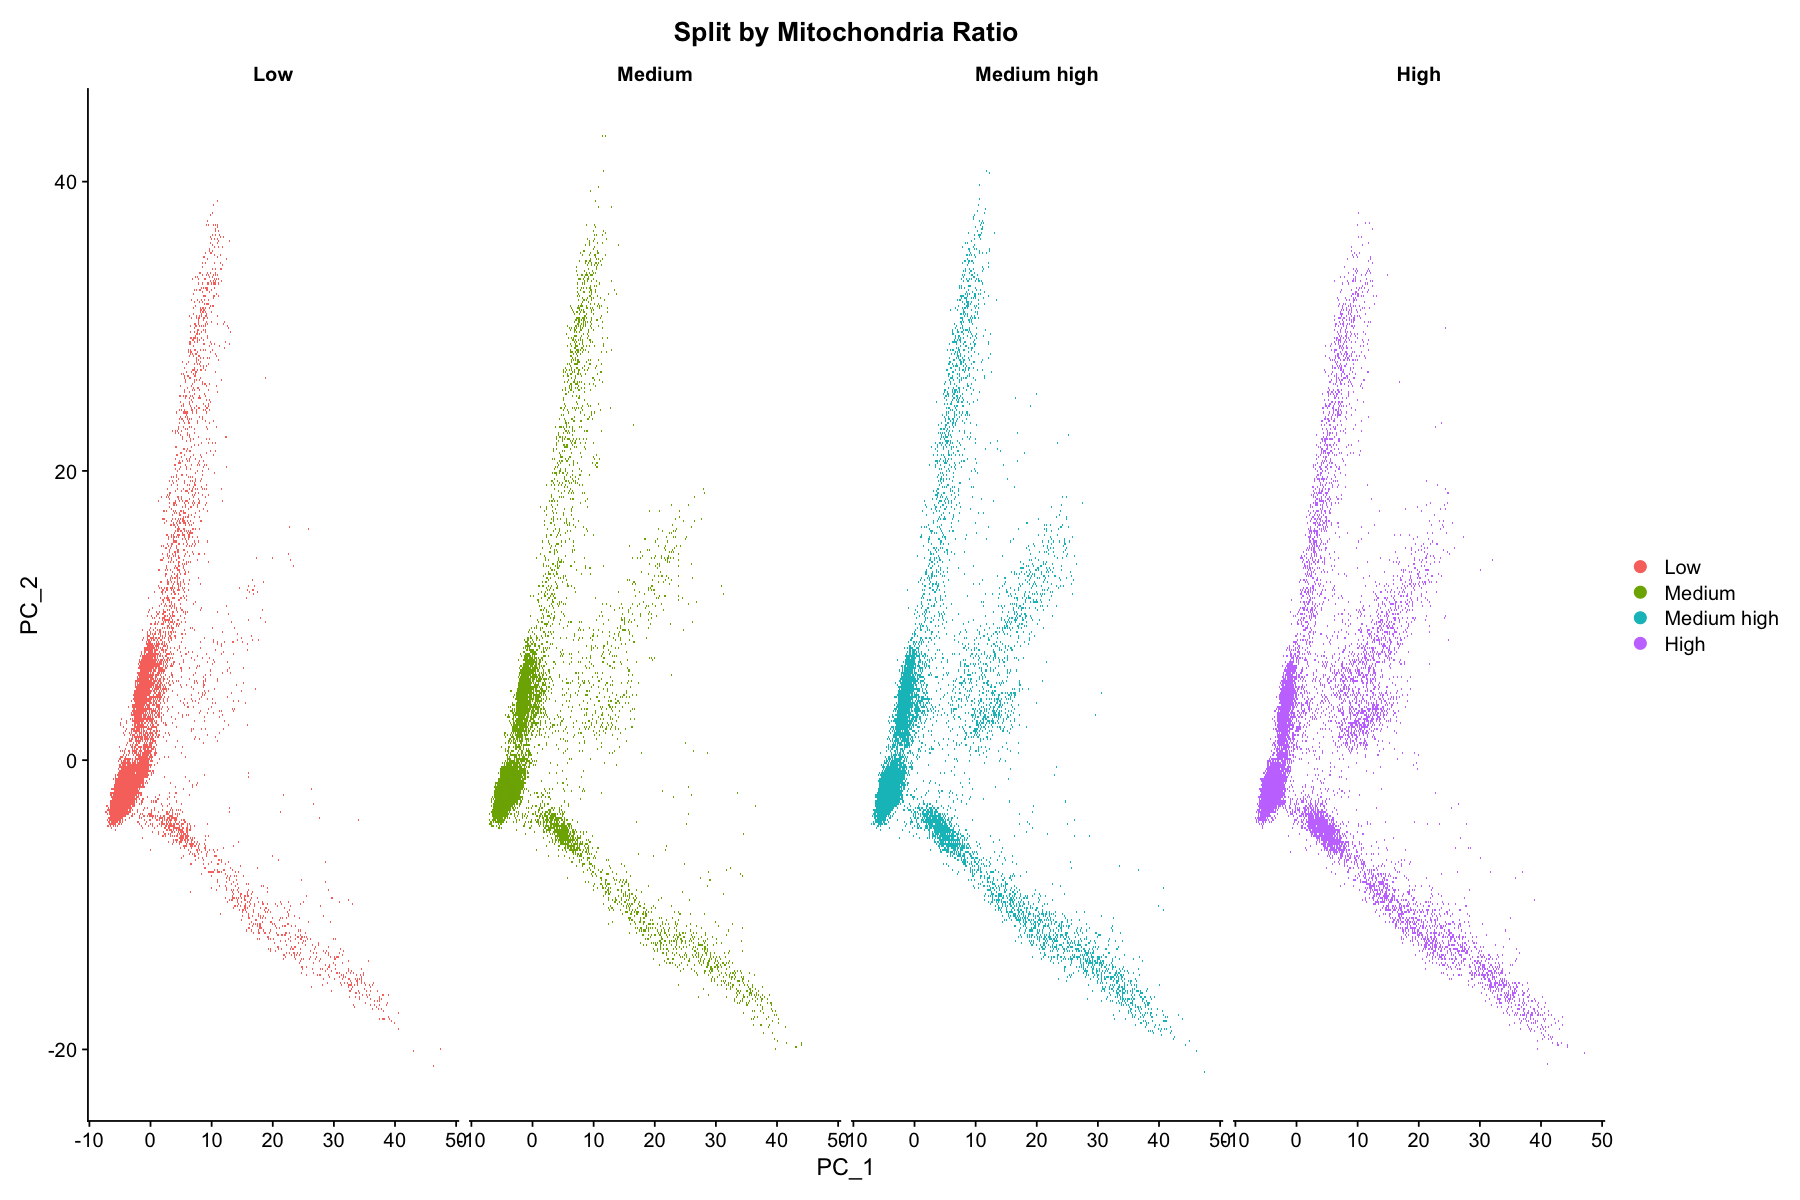

In [21]:
# for all the cells

DimPlot(LOG_NORM_NOVOALL_filt_PCA,
        reduction = "pca",
        group.by = "mitoFr",
        split.by = "mitoFr") +
    ggtitle("Split by Mitochondria Ratio")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



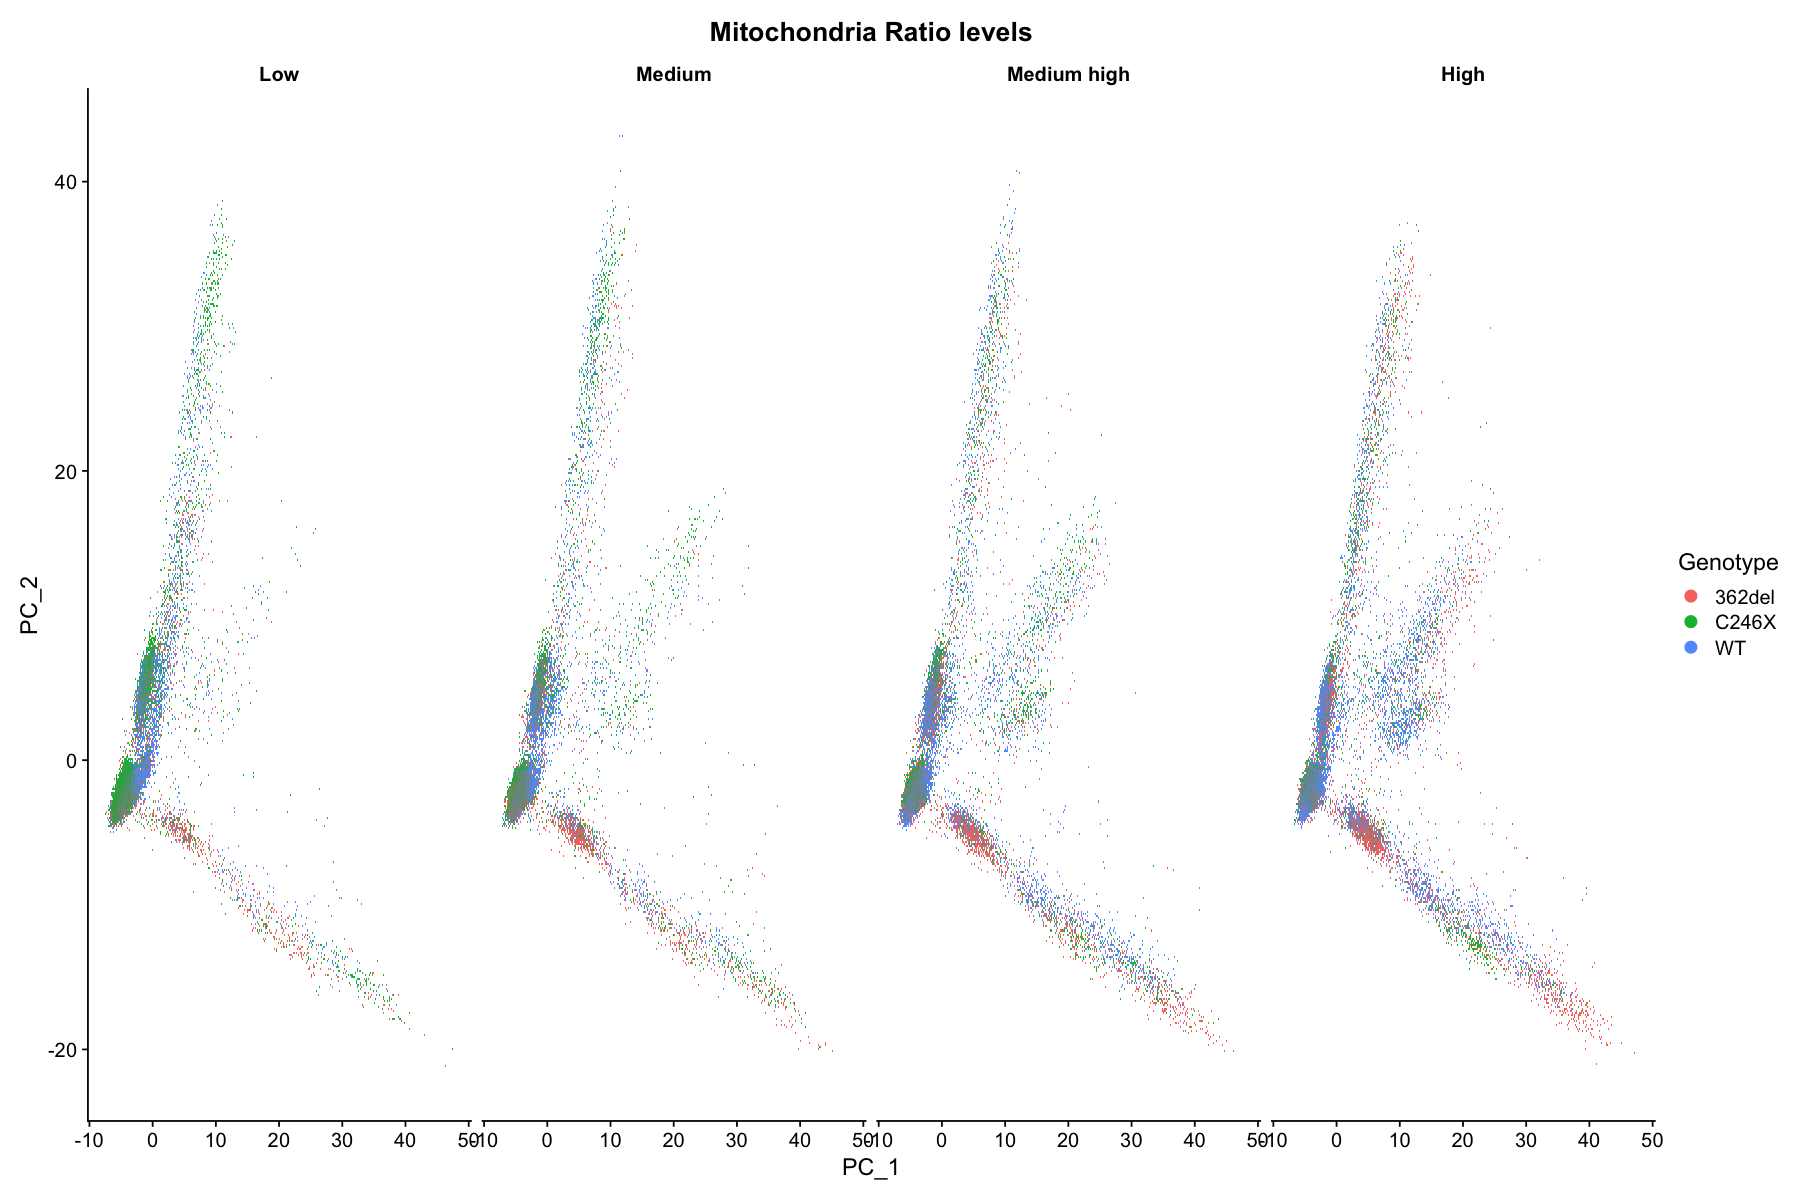

In [19]:
# colour by genotype

DimPlot(LOG_NORM_NOVOALL_filt_PCA,
        reduction = "pca",
        group.by = "genotype",
        split.by = "mitoFr") + 
labs(color = "Genotype", title = "Mitochondria Ratio levels")

## Elbow plot
This plot is used to see where the PCA stops describing the data. The initial biggest differences come from differences in the cell types.

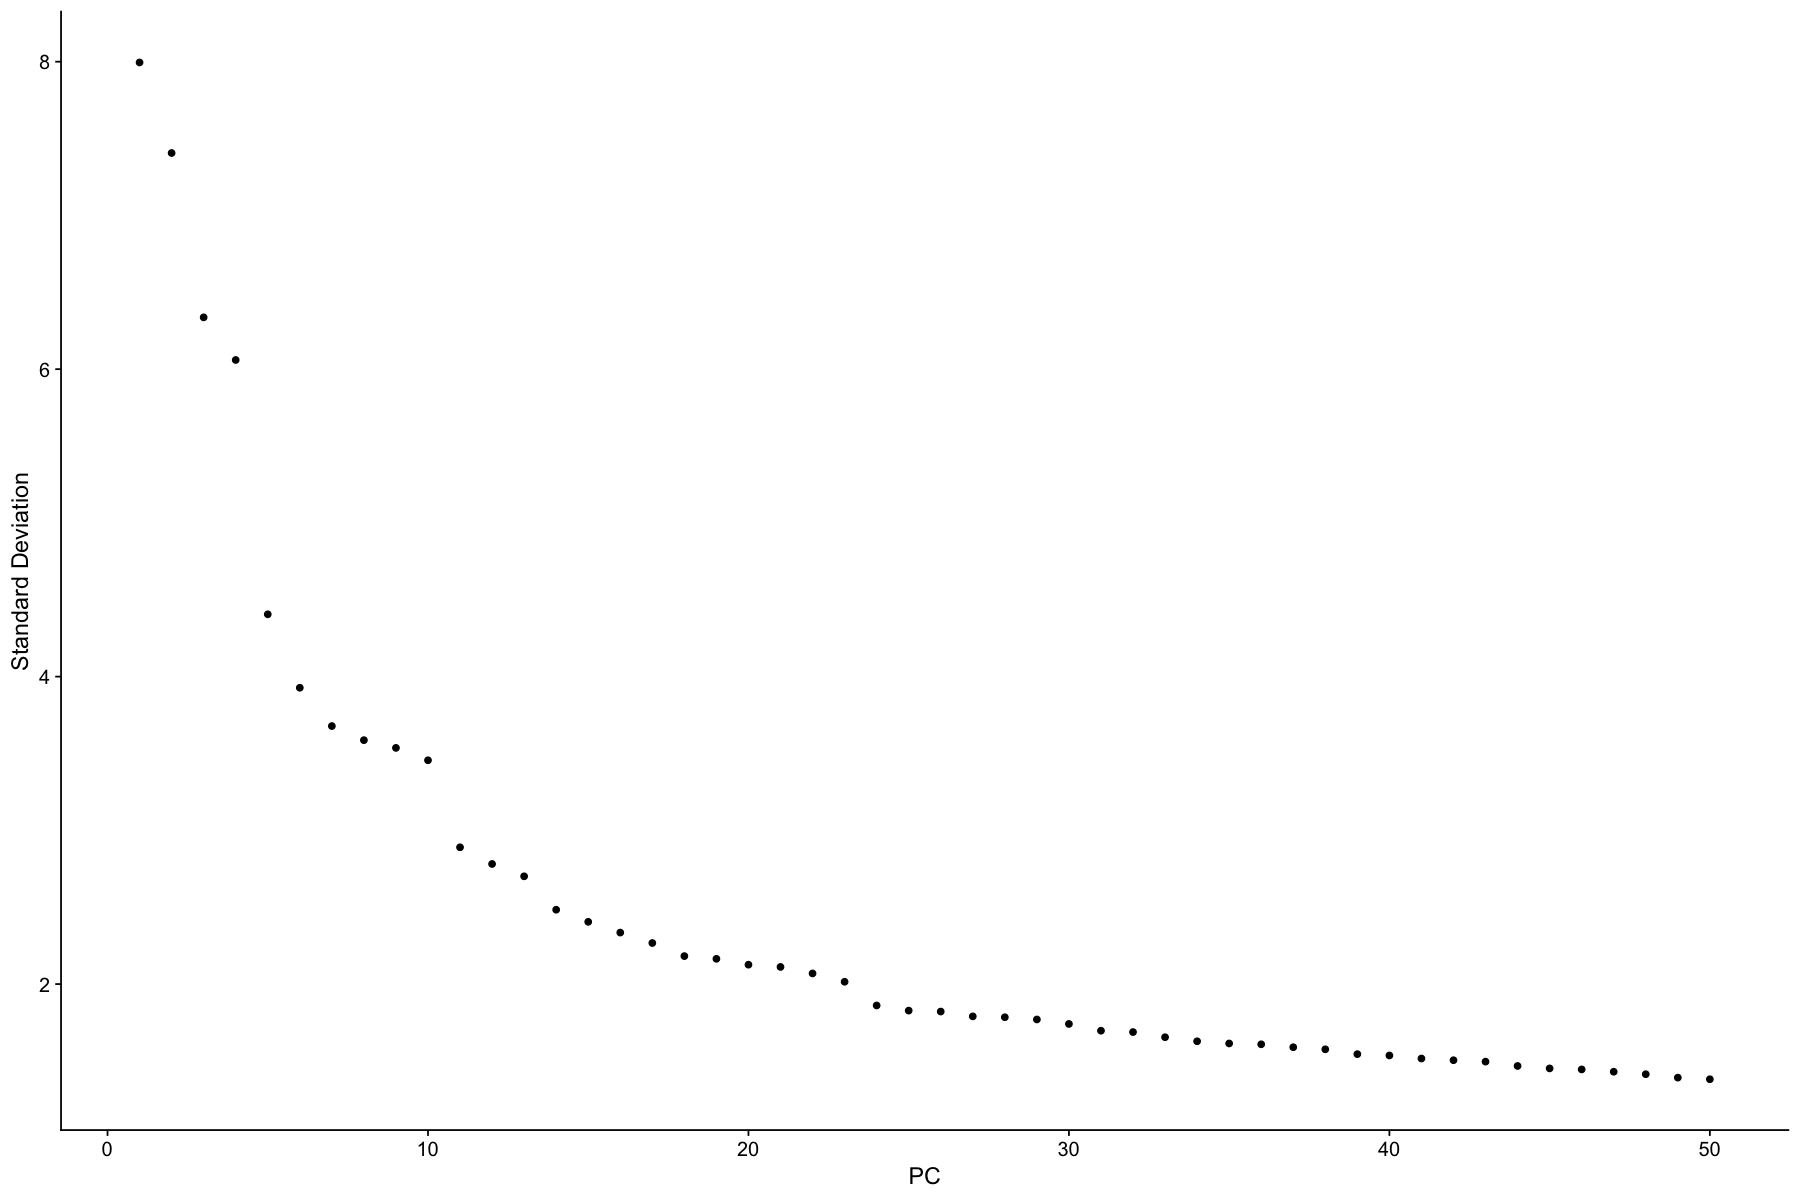

In [20]:
ElbowPlot(LOG_NORM_NOVOALL_filt_PCA, ndims = 50)

## Find neighbours

In [33]:
dim_input = as.numeric(readline(prompt = "Please input number of dimensions: "))
LOG_NORM_NOVOALL_filt_neigh <- FindNeighbors(LOG_NORM_NOVOALL_filt_PCA, dims = 1:dim_input, reduction = "pca")

Please input number of dimensions:  30


Computing nearest neighbor graph

Computing SNN



In [22]:
# save
user_dir3 = readline(prompt = "Please enter file directory to save LOG_NORM_NOVOALL_filt_neigh: ") # add .rds extension
saveRDS(LOG_NORM_NOVOALL_filt_neigh, file = user_dir3)

Please enter file directory to save LOG_NORM_NOVOALL_filt_neigh:  ../data_files/LOG_NORM_NOVOALL_filt_neigh.rds


## Find clusters

In [24]:
# initially, the user may input 0.2,0.4,0.6,0.8
user_res_inp = readline(prompt = "Please provide a list of resolutions separated by a comma: ") 

Please provide a list of resolutions separated by a comma:  0.2,0.4,0.6,0.8


In [25]:
# split string at the comma and convert chars to numeric
res = as.numeric(str_split_1(user_res_inp, ",")) 

In [26]:
LOG_NORM_NOVOALL_filt_clust <- FindClusters(LOG_NORM_NOVOALL_filt_neigh, resolution = res)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9737
Number of communities: 23
Elapsed time: 27 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9611
Number of communities: 28
Elapsed time: 26 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9506
Number of communities: 31
Elapsed time: 24 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9410
Number of communities: 39
Elapsed time: 27 seconds


In [27]:
# save 
user_dir4 = readline(prompt = "Please enter file directory to save LOG_NORM_NOVOALL_filt_clust: ") # add .rds extension
saveRDS(LOG_NORM_NOVOALL_filt_clust, file = user_dir4)

Please enter file directory to save LOG_NORM_NOVOALL_filt_clust:  ../data_files/LOG_NORM_NOVOALL_filt_clust.rds


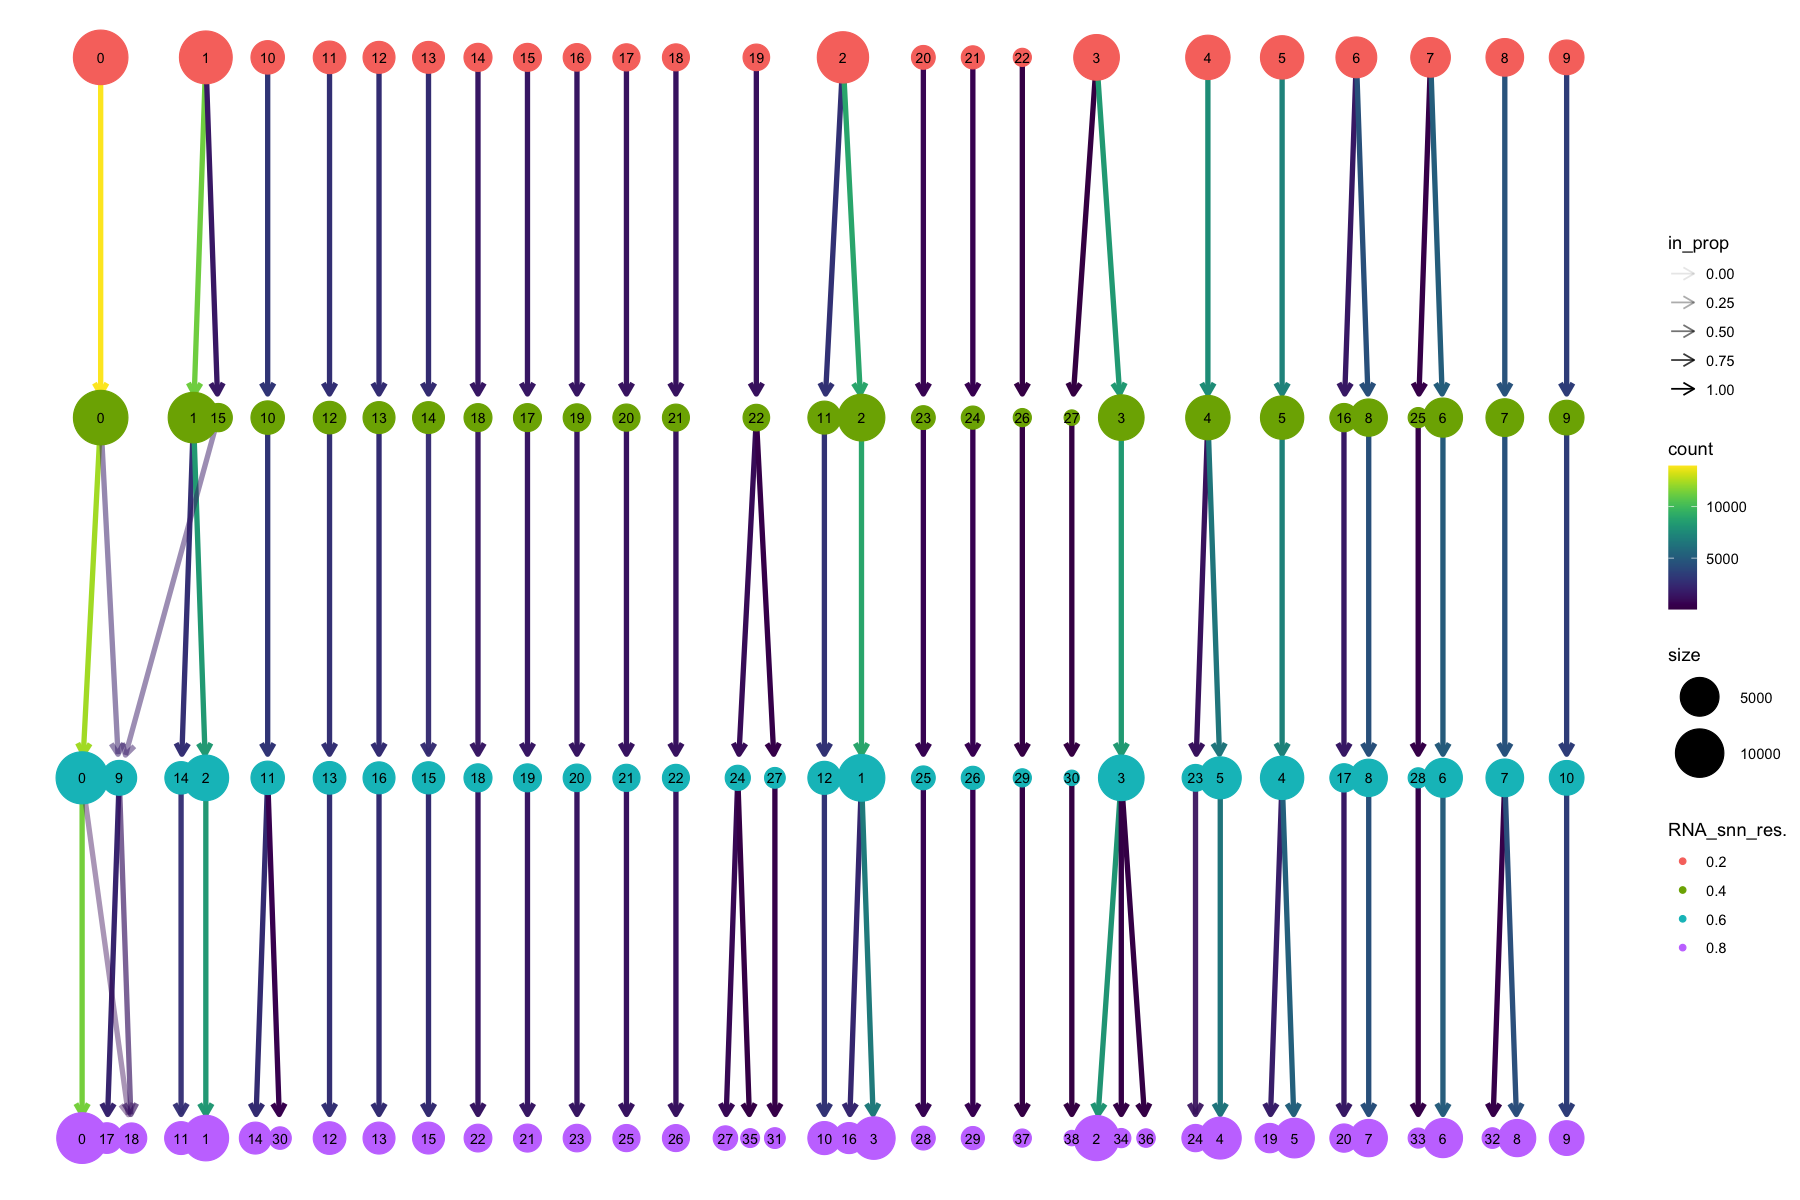

In [29]:
clustree(LOG_NORM_NOVOALL_filt_clust) 

### Cluster quality control - check number and proportion of cells in each cluste

If there are some clusters that don't have a genotype then that might mean integration is needed. 

In [114]:
plots_count = list()
plots_prop = list()

for (value in res) {
    resolution = as.character(value)

    # Extract cell identity and genotype info from seurat object to determine the number of cells per cluster per sample
    n_cells_cluster1 = LOG_NORM_NOVOALL_filt_clust@meta.data %>% 
                    select(c("orig.ident", "genotype", ends_with(resolution))) %>% 
                    rename(seurat_clusters = 3) %>% # rename the last col as seurat cluster to use in plot later
                    count(orig.ident, seurat_clusters, genotype) # count (orig.ident, seurat_cluster, genotype) triplets = number of cells in each cluster per sample, per genotype (since each row is one cell)

    # for the second barplot
    n_cells_cluster2 = LOG_NORM_NOVOALL_filt_clust@meta.data %>% 
                    select(c("orig.ident", "genotype", ends_with(resolution))) %>%
                    rename(seurat_clusters = 3)

    # Barplot of number of cells in each cluster, coloured by genotype
    p1 = ggplot(data = n_cells_cluster1, aes(x = seurat_clusters, y = n)) + 
              	geom_col(aes(fill = genotype), position = "stack", color = "black") + # use col bc y-vals alr pre-calculated, if using geom_bar --> then add stat = "identity" to tell R to use the pre-calculated values, note that position = "stack" is the default
                scale_y_continuous(breaks = seq(0, 15000, by = 1000)) + 
                theme_classic() + 
                labs(x = "Cluster Identity\n", y = "Cell Count", title = paste0("Resolution = ", resolution, "\n")) + 
                theme(axis.text.x = element_text(vjust = 1, size = 13),
                      axis.text.y = element_text(size = 13),
                      axis.title.x = element_text(size = 18),
                      axis.title.y = element_text(size = 18),
                      legend.text = element_text(size = 13),
                      legend.title = element_text(size = 15),
                      plot.title = element_text(size = 22, hjust = 0.5))

    # Barplot of proportion of cells in each cluster, coloured by genotype
    p2 = ggplot(n_cells_cluster2) +
            geom_bar(aes(x = seurat_clusters, fill = genotype), position = "fill") + 
            scale_y_continuous(breaks = seq(0, 1.0, by = 0.1)) + 
            theme_classic() + 
            labs(x = "Cluster Identity\n", y = "Proportion", title = paste0("Resolution = ", resolution)) +  
            theme(axis.text.x = element_text(vjust = 1, size = 13),
                  axis.text.y = element_text(size = 13),
                  axis.title.x = element_text(size = 18),
                  axis.title.y = element_text(size = 18),
                  legend.text = element_text(size = 13),
                  legend.title = element_text(size = 15),
                  plot.title = element_text(size = 22, hjust = 0.5))
    
    # save to lists
    plots_count[[paste0("plot", resolution)]] = p1
    plots_prop[[paste0("plot", resolution)]] = p2
    
    }
    

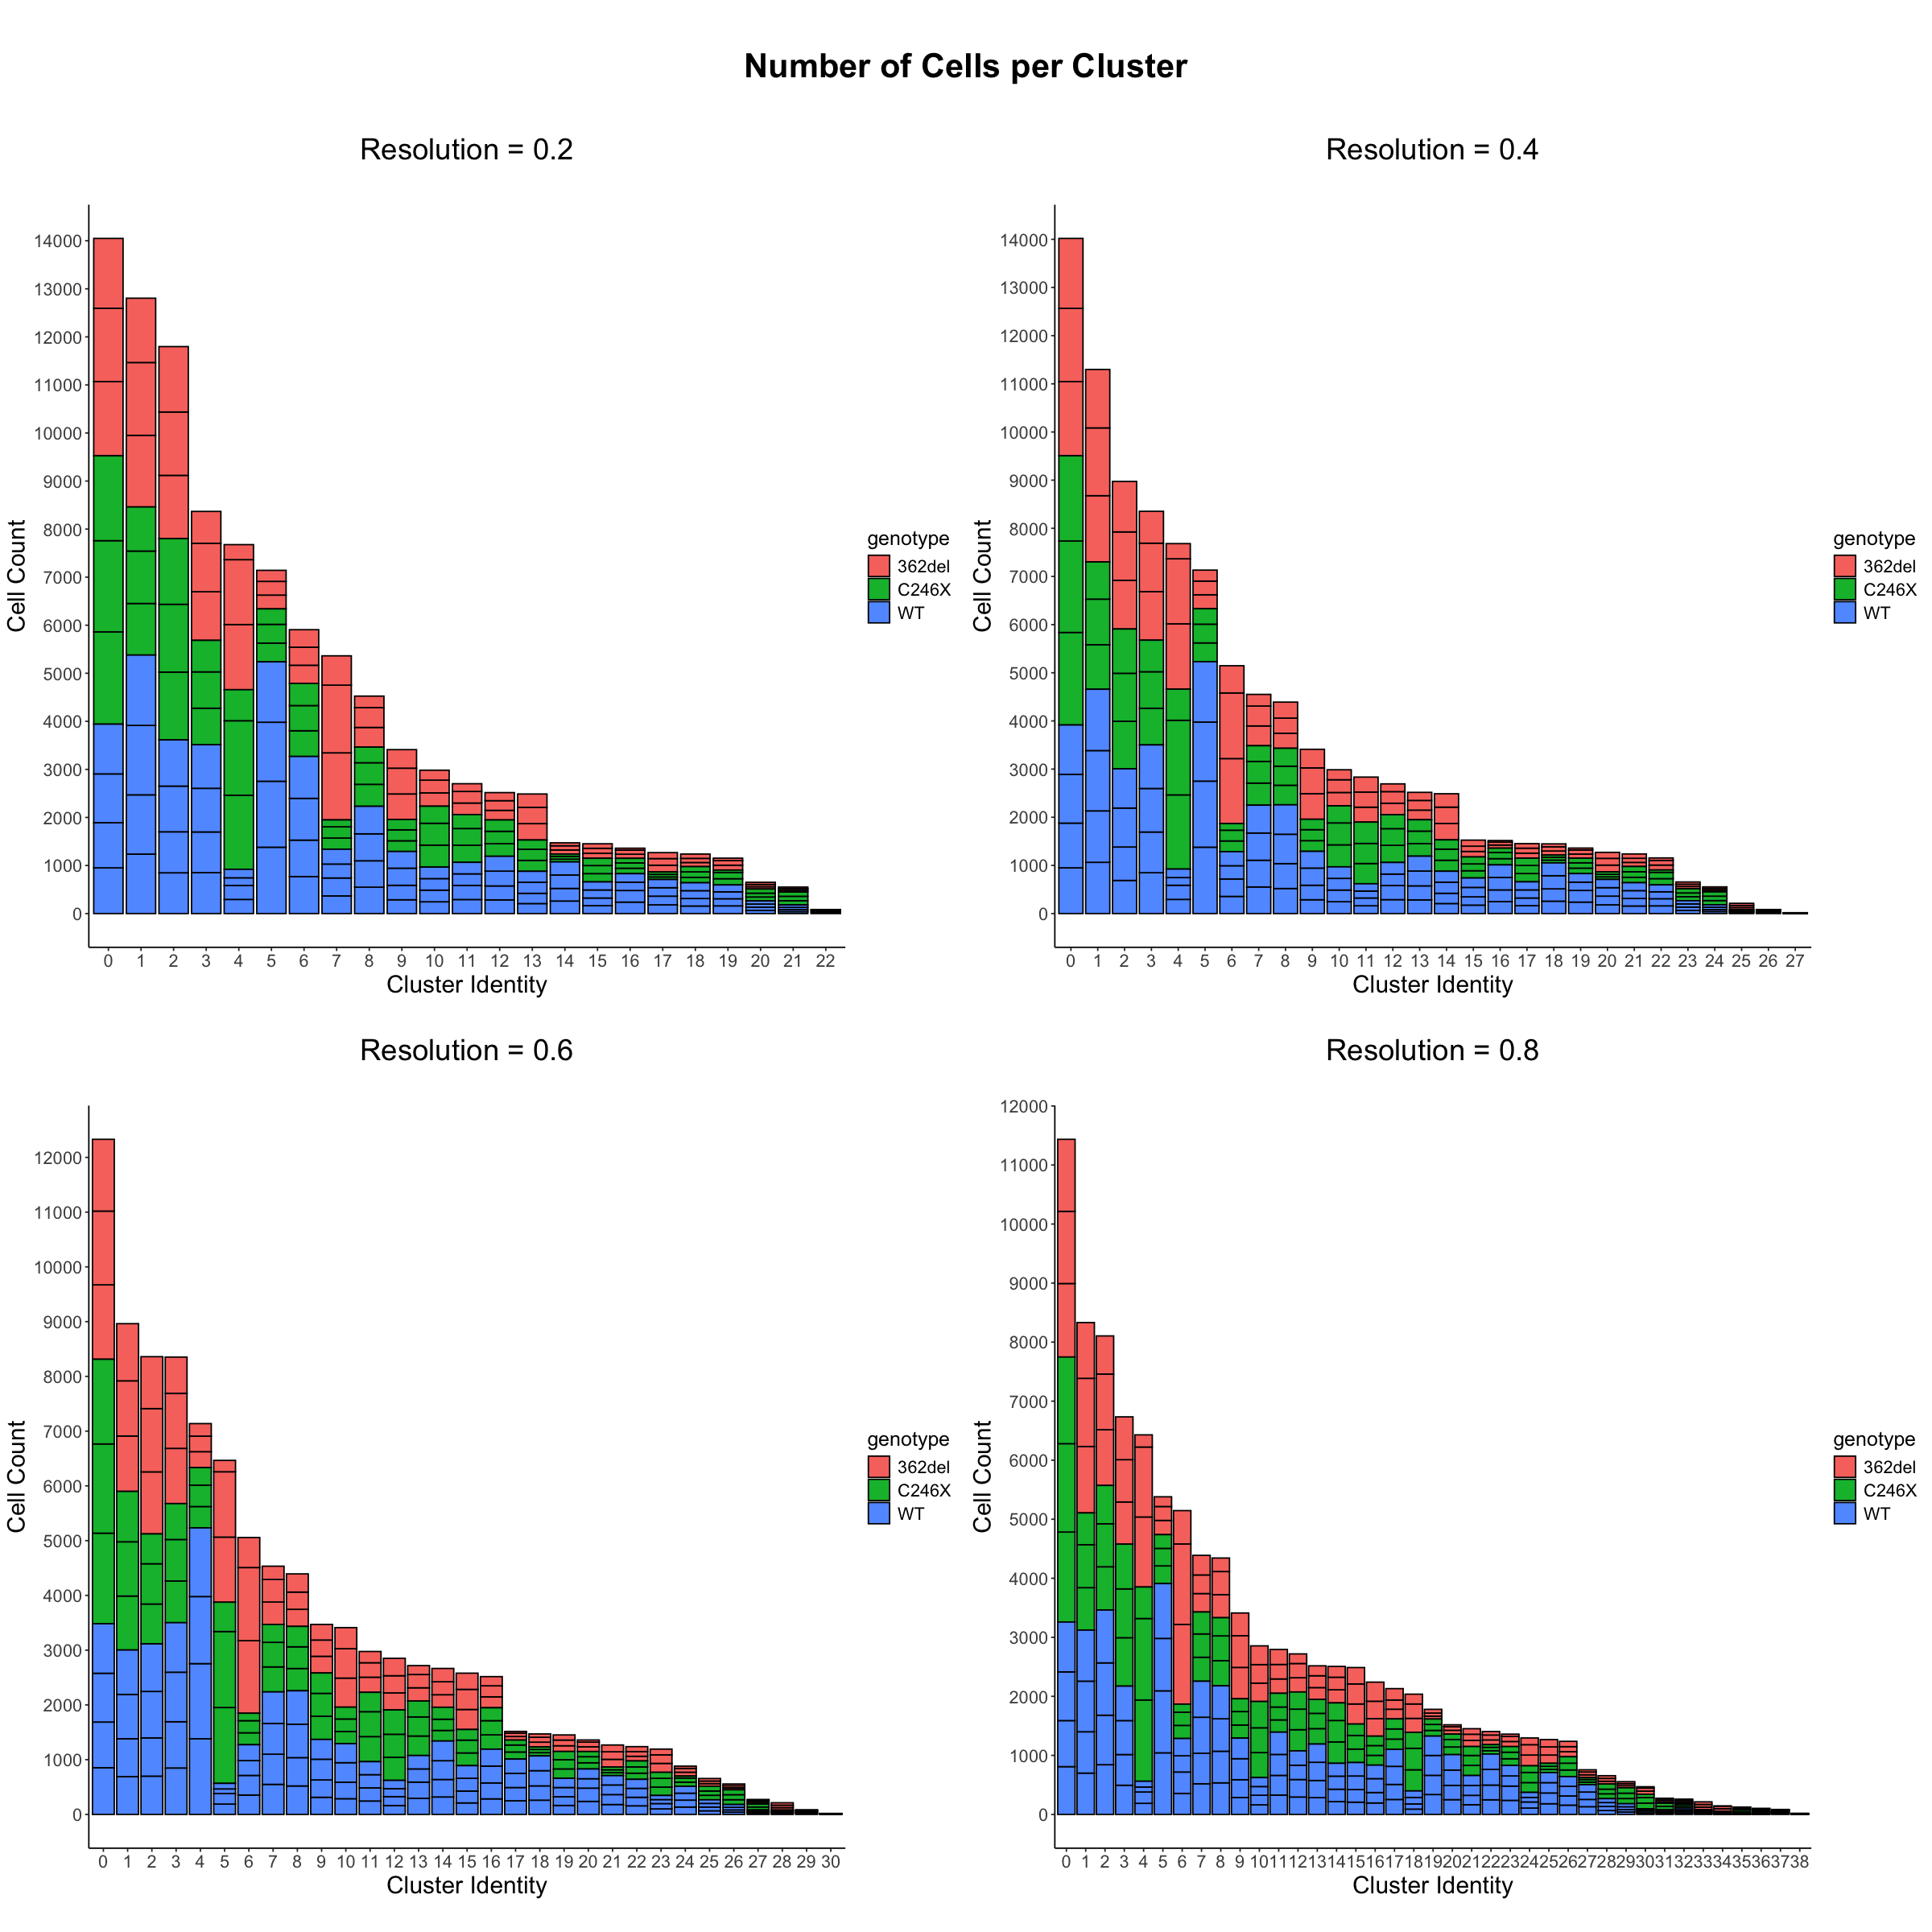

In [134]:
# Arrange plots in grid
grid.arrange(grobs = plots_count, ncol = ceiling(length(plots_count)/2),
             top = textGrob("\nNumber of Cells per Cluster\n", gp = gpar(fontsize = 25, fontface = "bold")))

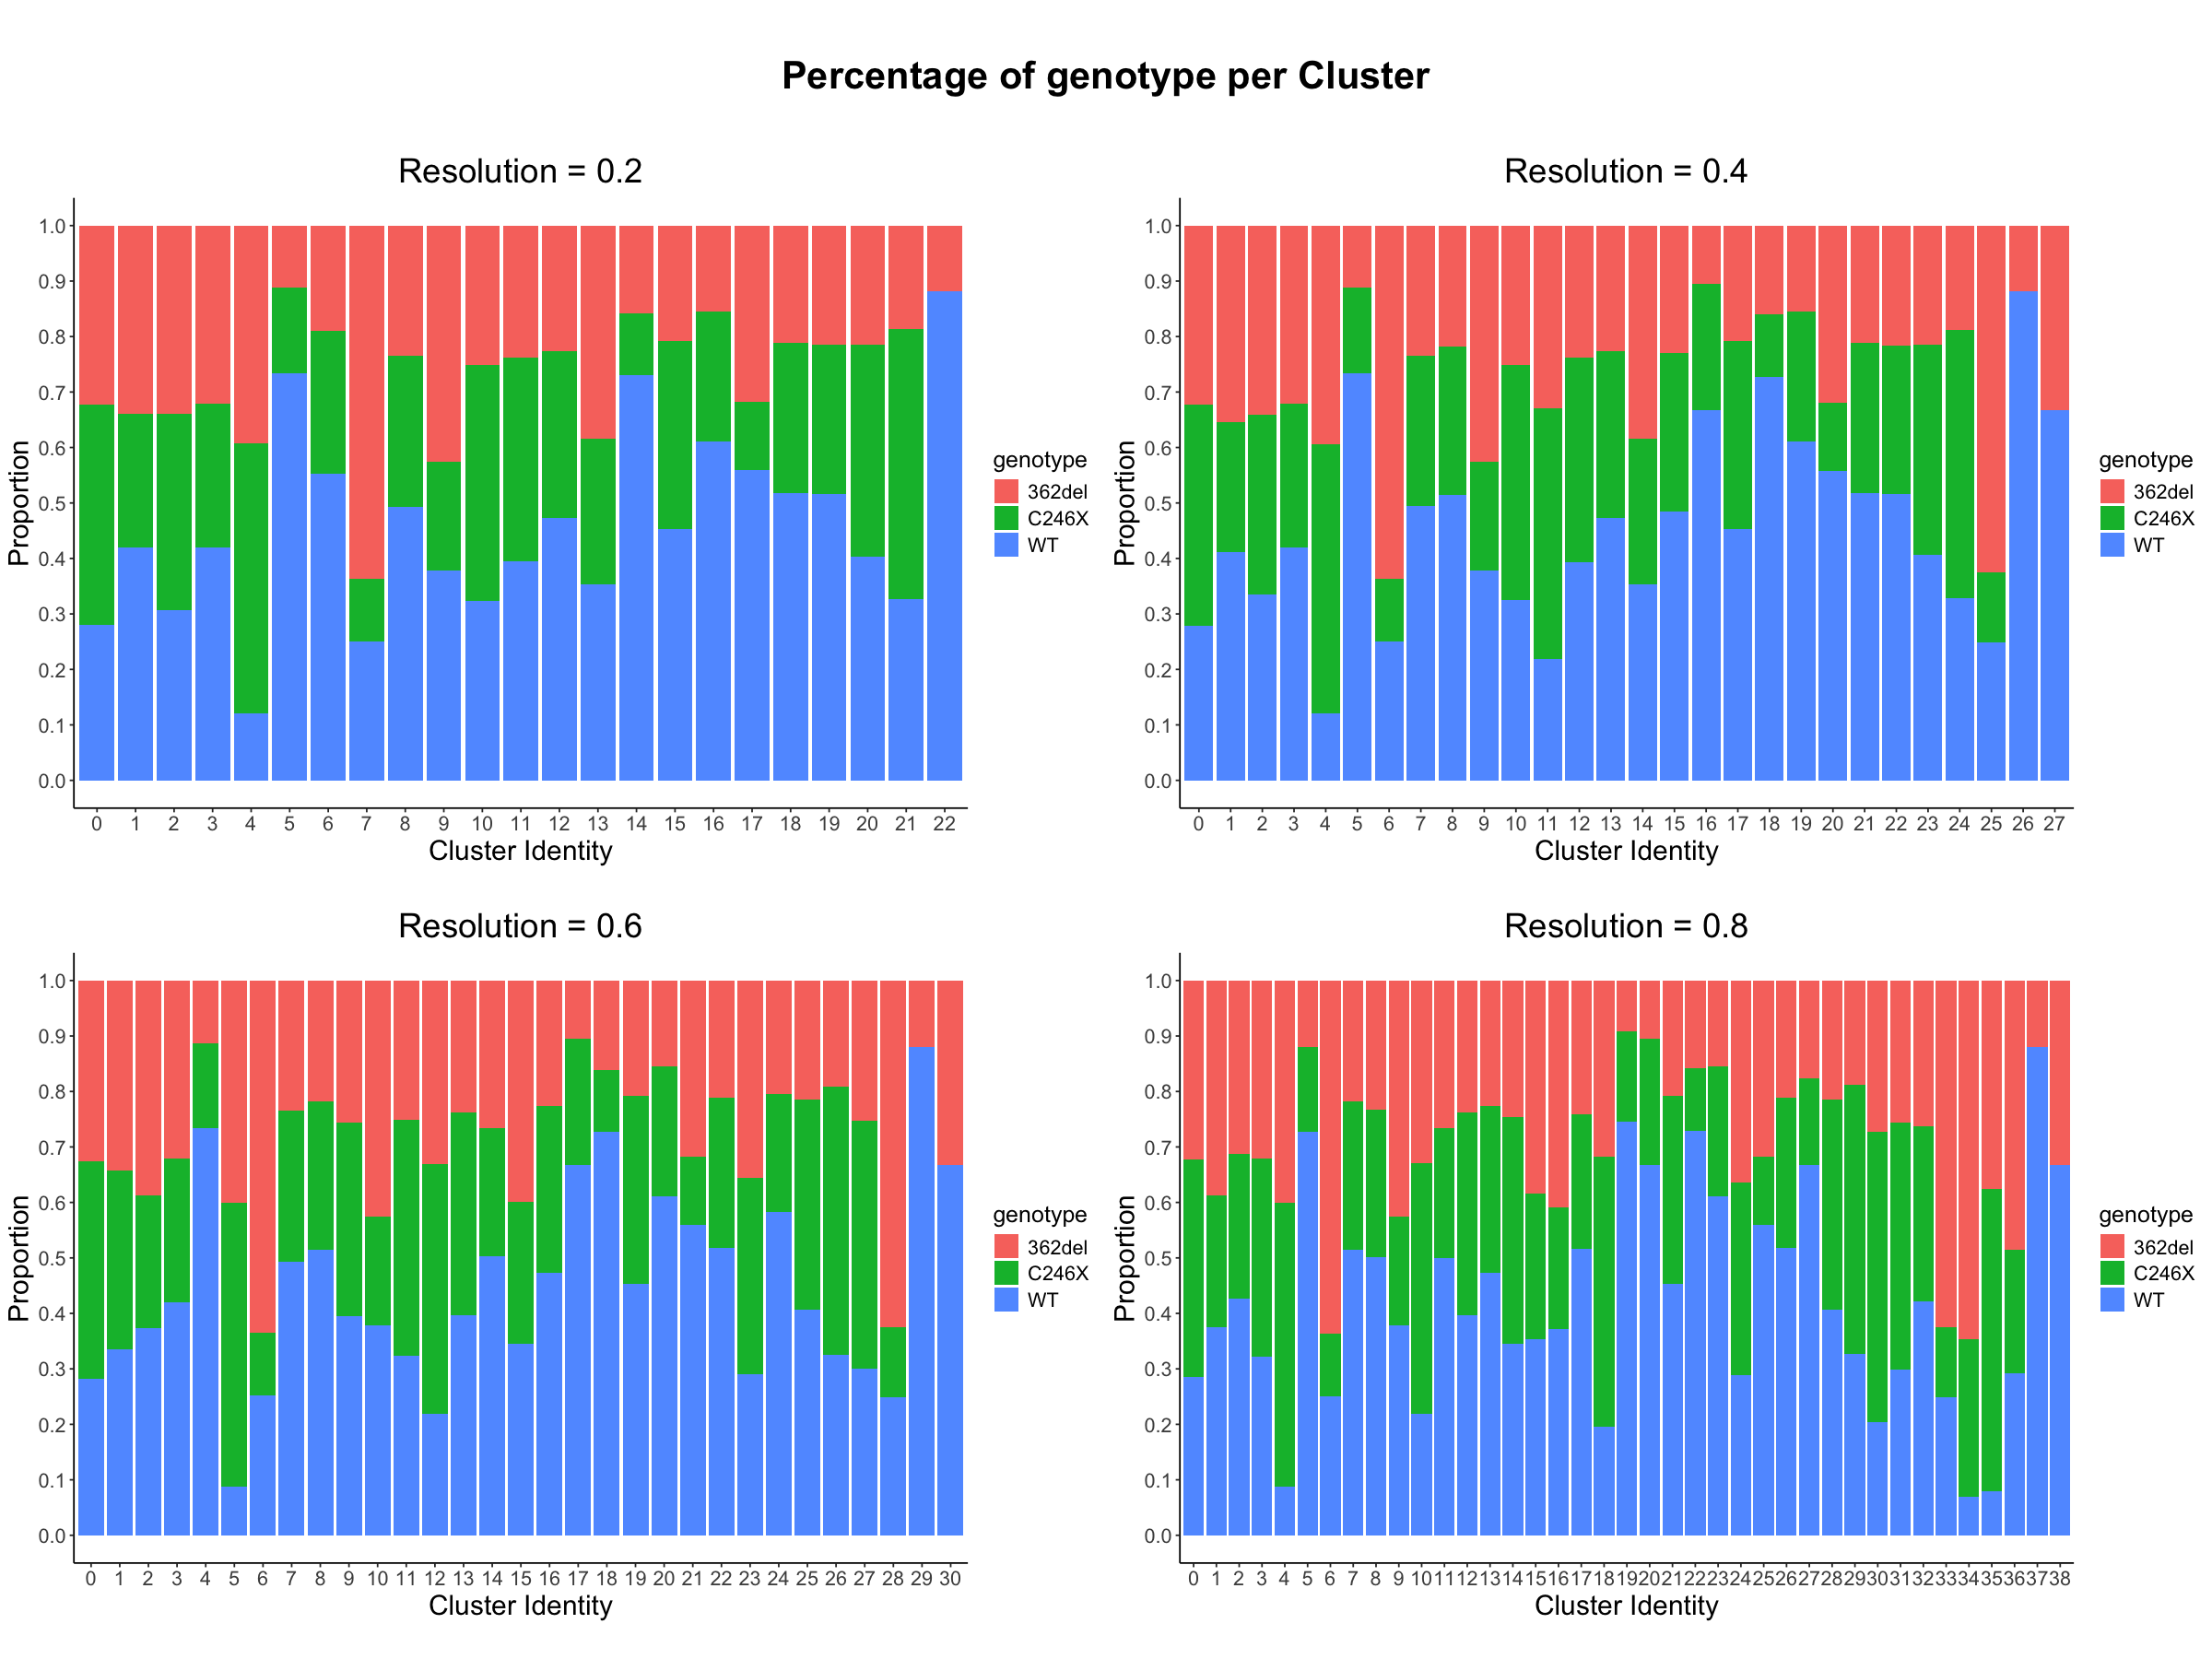

In [118]:
grid.arrange(grobs = plots_prop, ncol = ceiling(length(plots_prop)/2),
             top = textGrob("\nPercentage of genotype per Cluster\n", gp = gpar(fontsize = 25, fontface = "bold")))

## UMap

In [57]:
LOG_NORM_NOVOALL_filt_umap <- RunUMAP(LOG_NORM_NOVOALL_filt_clust, dims = 1:30, reduction = "pca", reduction.name = "umap_unintegrated")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:45:08 UMAP embedding parameters a = 0.9922 b = 1.112

12:45:08 Read 100963 rows and found 30 numeric columns

12:45:08 Using Annoy for neighbor search, n_neighbors = 30

12:45:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:45:14 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//RtmpSGNMp7/file1484612f5b738

12:45:14 Searching Annoy index using 1 thread, search_k = 3000

12:45:36 Annoy recall = 100%

12:45:37 Commencing smooth kNN distance calib

In [59]:
# save
user_dir5 = readline(prompt = "Please enter file directory to save LOG_NORM_NOVOALL_filt_umap: ")
saveRDS(LOG_NORM_NOVOALL_filt_umap, user_dir5)

Please enter file directory to save LOG_NORM_NOVOALL_filt_umap:  ../data_files/LOG_NORM_NOVOALL_filt_umap.rds


## Dimension plots 

### Overall UMAP

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



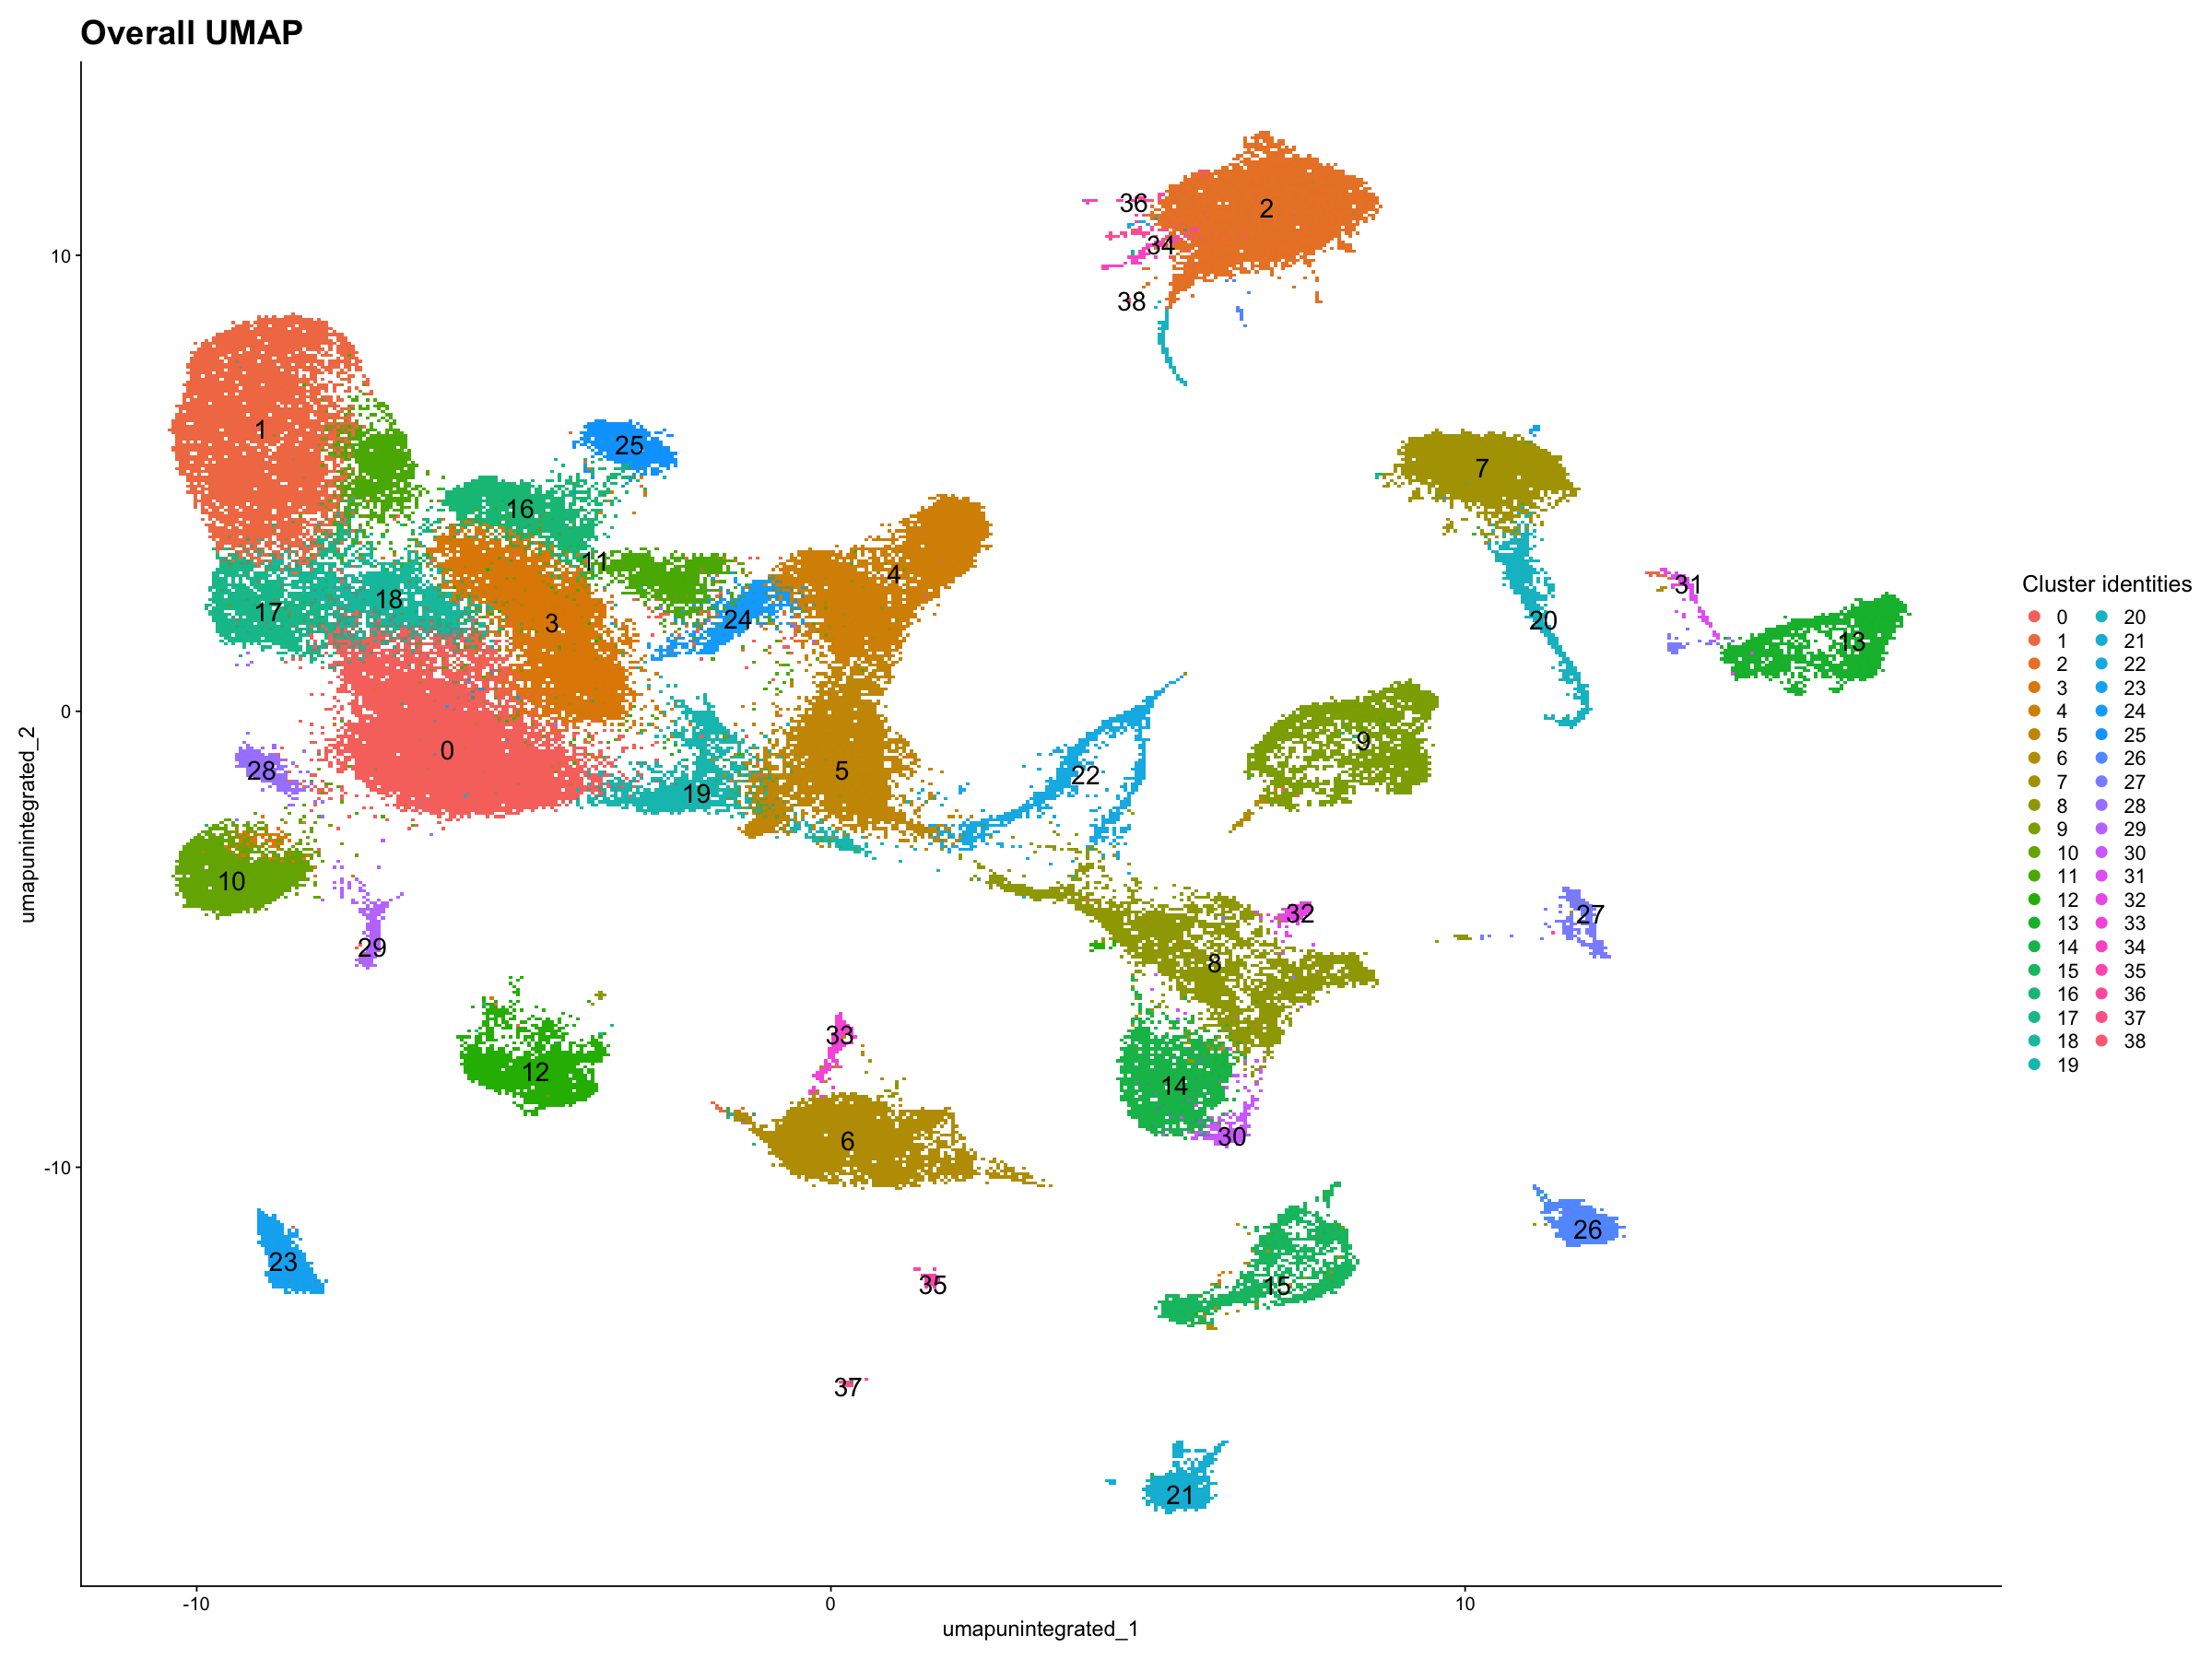

In [143]:
options(repr.plot.width=20, repr.plot.height=15)

DimPlot(LOG_NORM_NOVOALL_filt_umap, reduction = "umap_unintegrated", label = TRUE, label.size = 6) +  
    ggtitle("Overall UMAP") + 
    labs(color = "Cluster identities") + 
    theme(legend.text = element_text(size = 13),
          legend.title = element_text(size = 15),
          plot.title = element_text(size = 22))

### Cluster quality after running UMAP

#### Feature plot (column features)
We would like all clusters to look pale across the plot. If any one cluster stands out, integration might be needed.

Note that the resolution does not necessarily matter here as we just want to see the colour across the plot. At a different resolution, the plot would look the same, the only thing changing would be the cluster numbers.

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



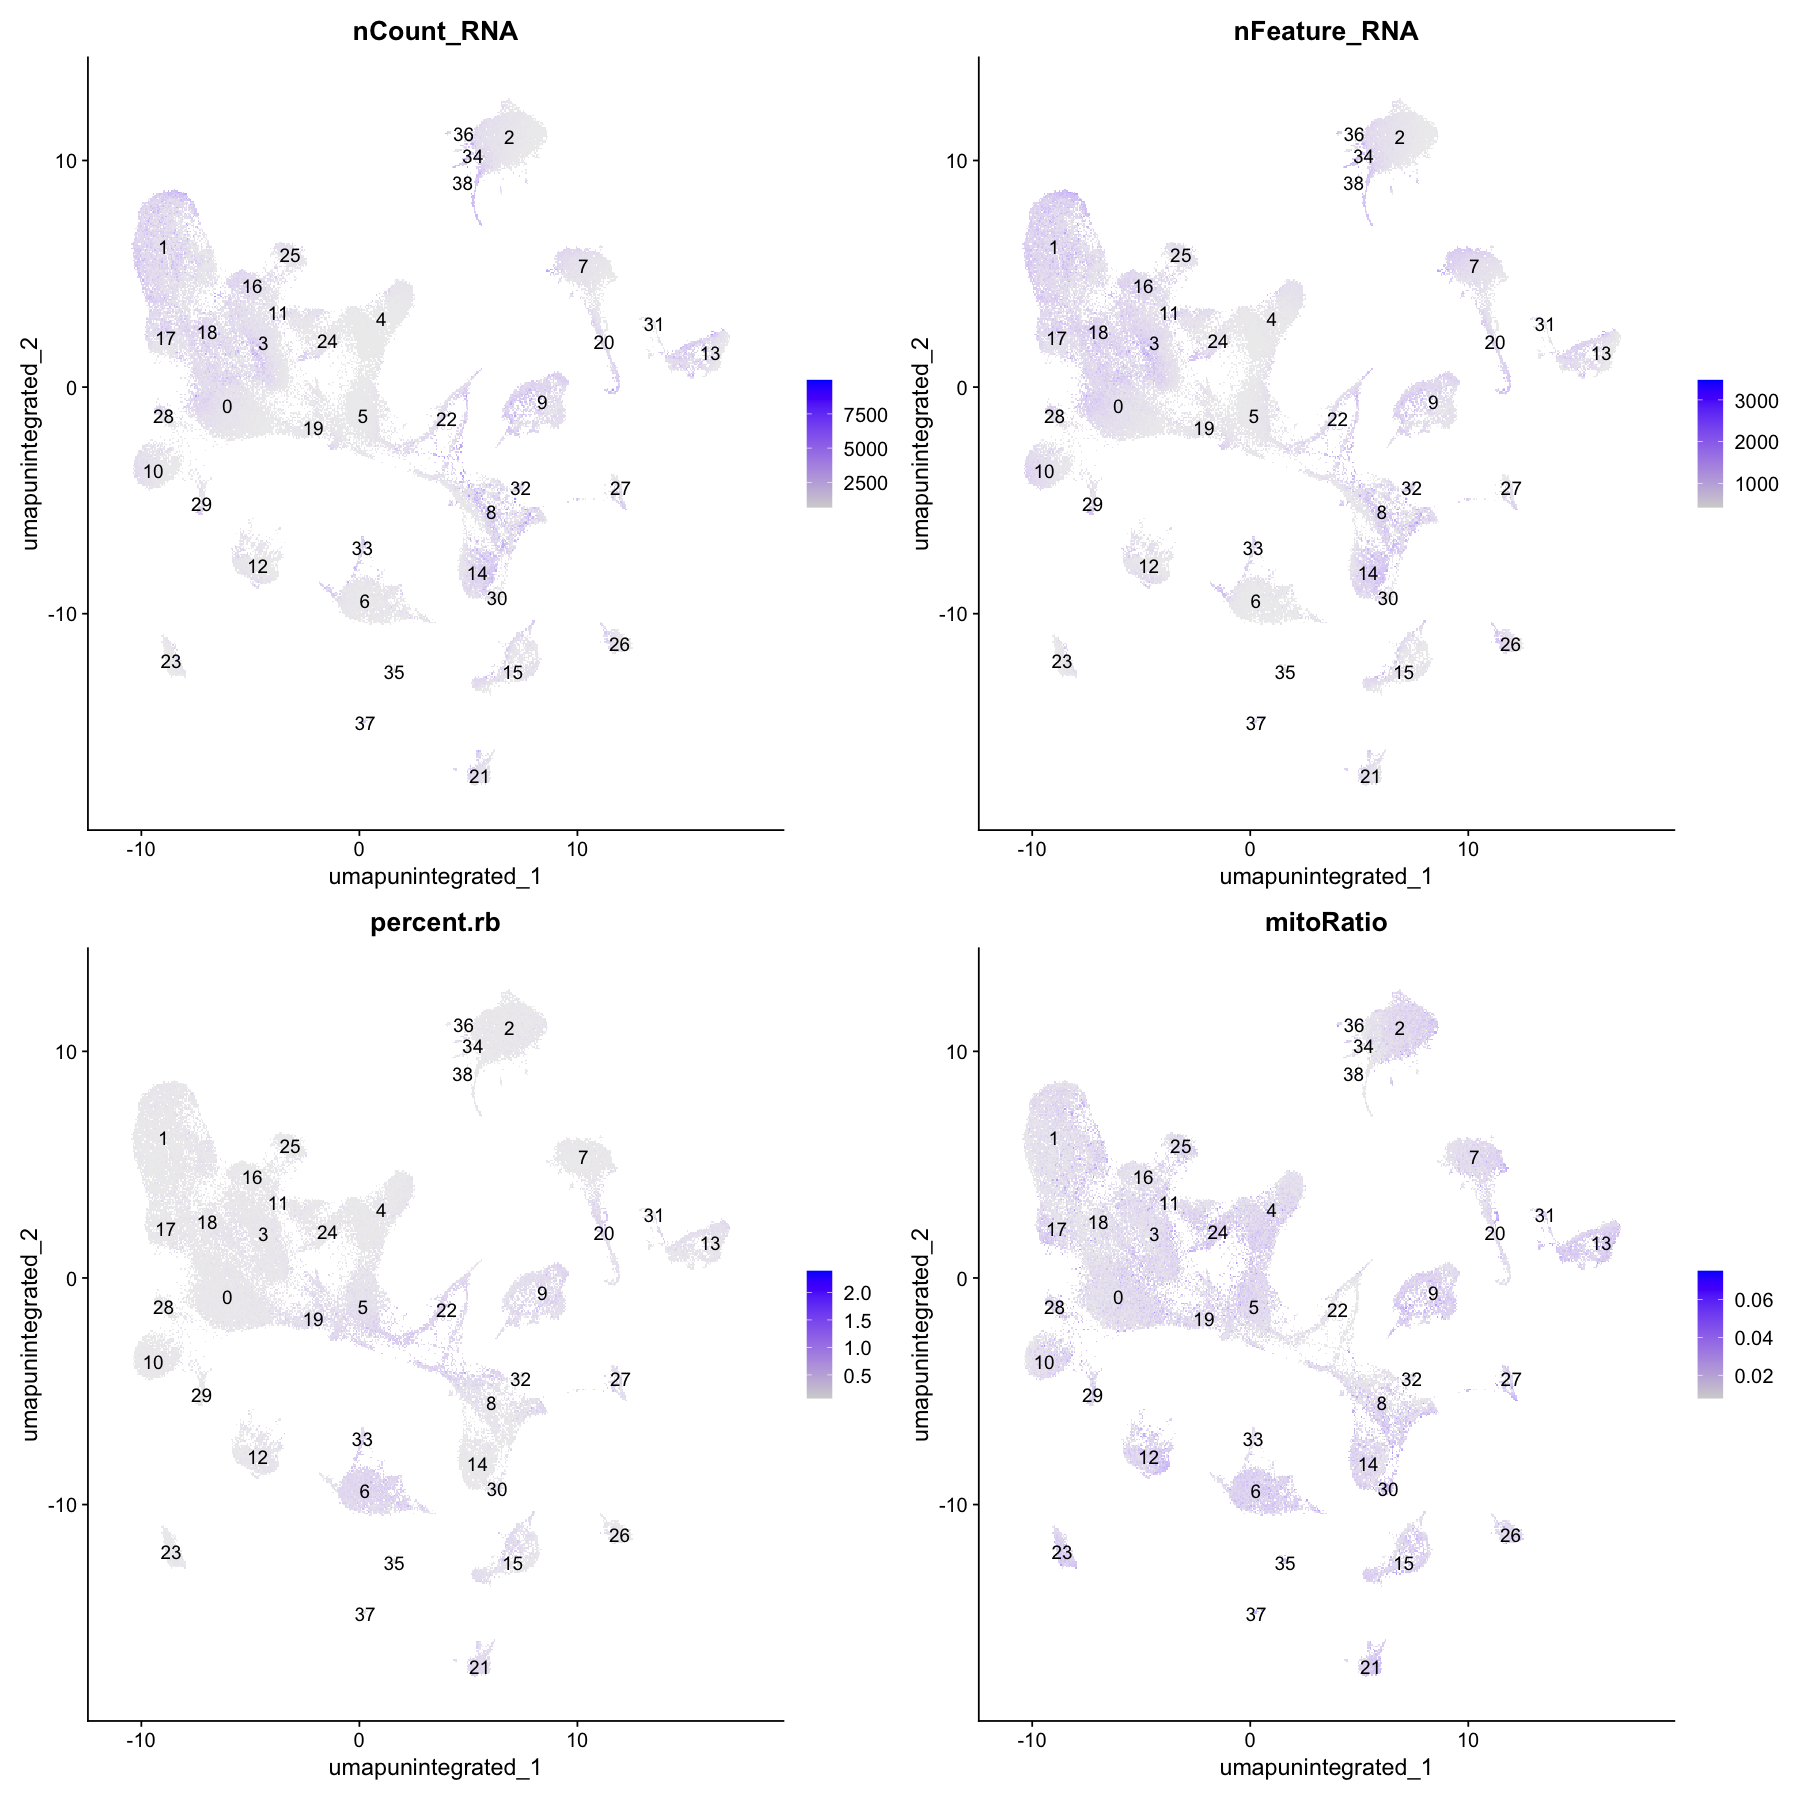

In [138]:
options(repr.plot.width=15, repr.plot.height=15)

# Determine metrics to plot present in seurat_integrated@meta.data
metrics <-  c("nCount_RNA", "nFeature_RNA", "percent.rb", "mitoRatio")

FeaturePlot(LOG_NORM_NOVOALL_filt_umap, 
            reduction = "umap_unintegrated", 
            features = metrics,
            pt.size = 0.4, 
            order = TRUE,
            min.cutoff = 'q10',
            label = TRUE)

#### UMAP of cells in each cluster by genotype

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



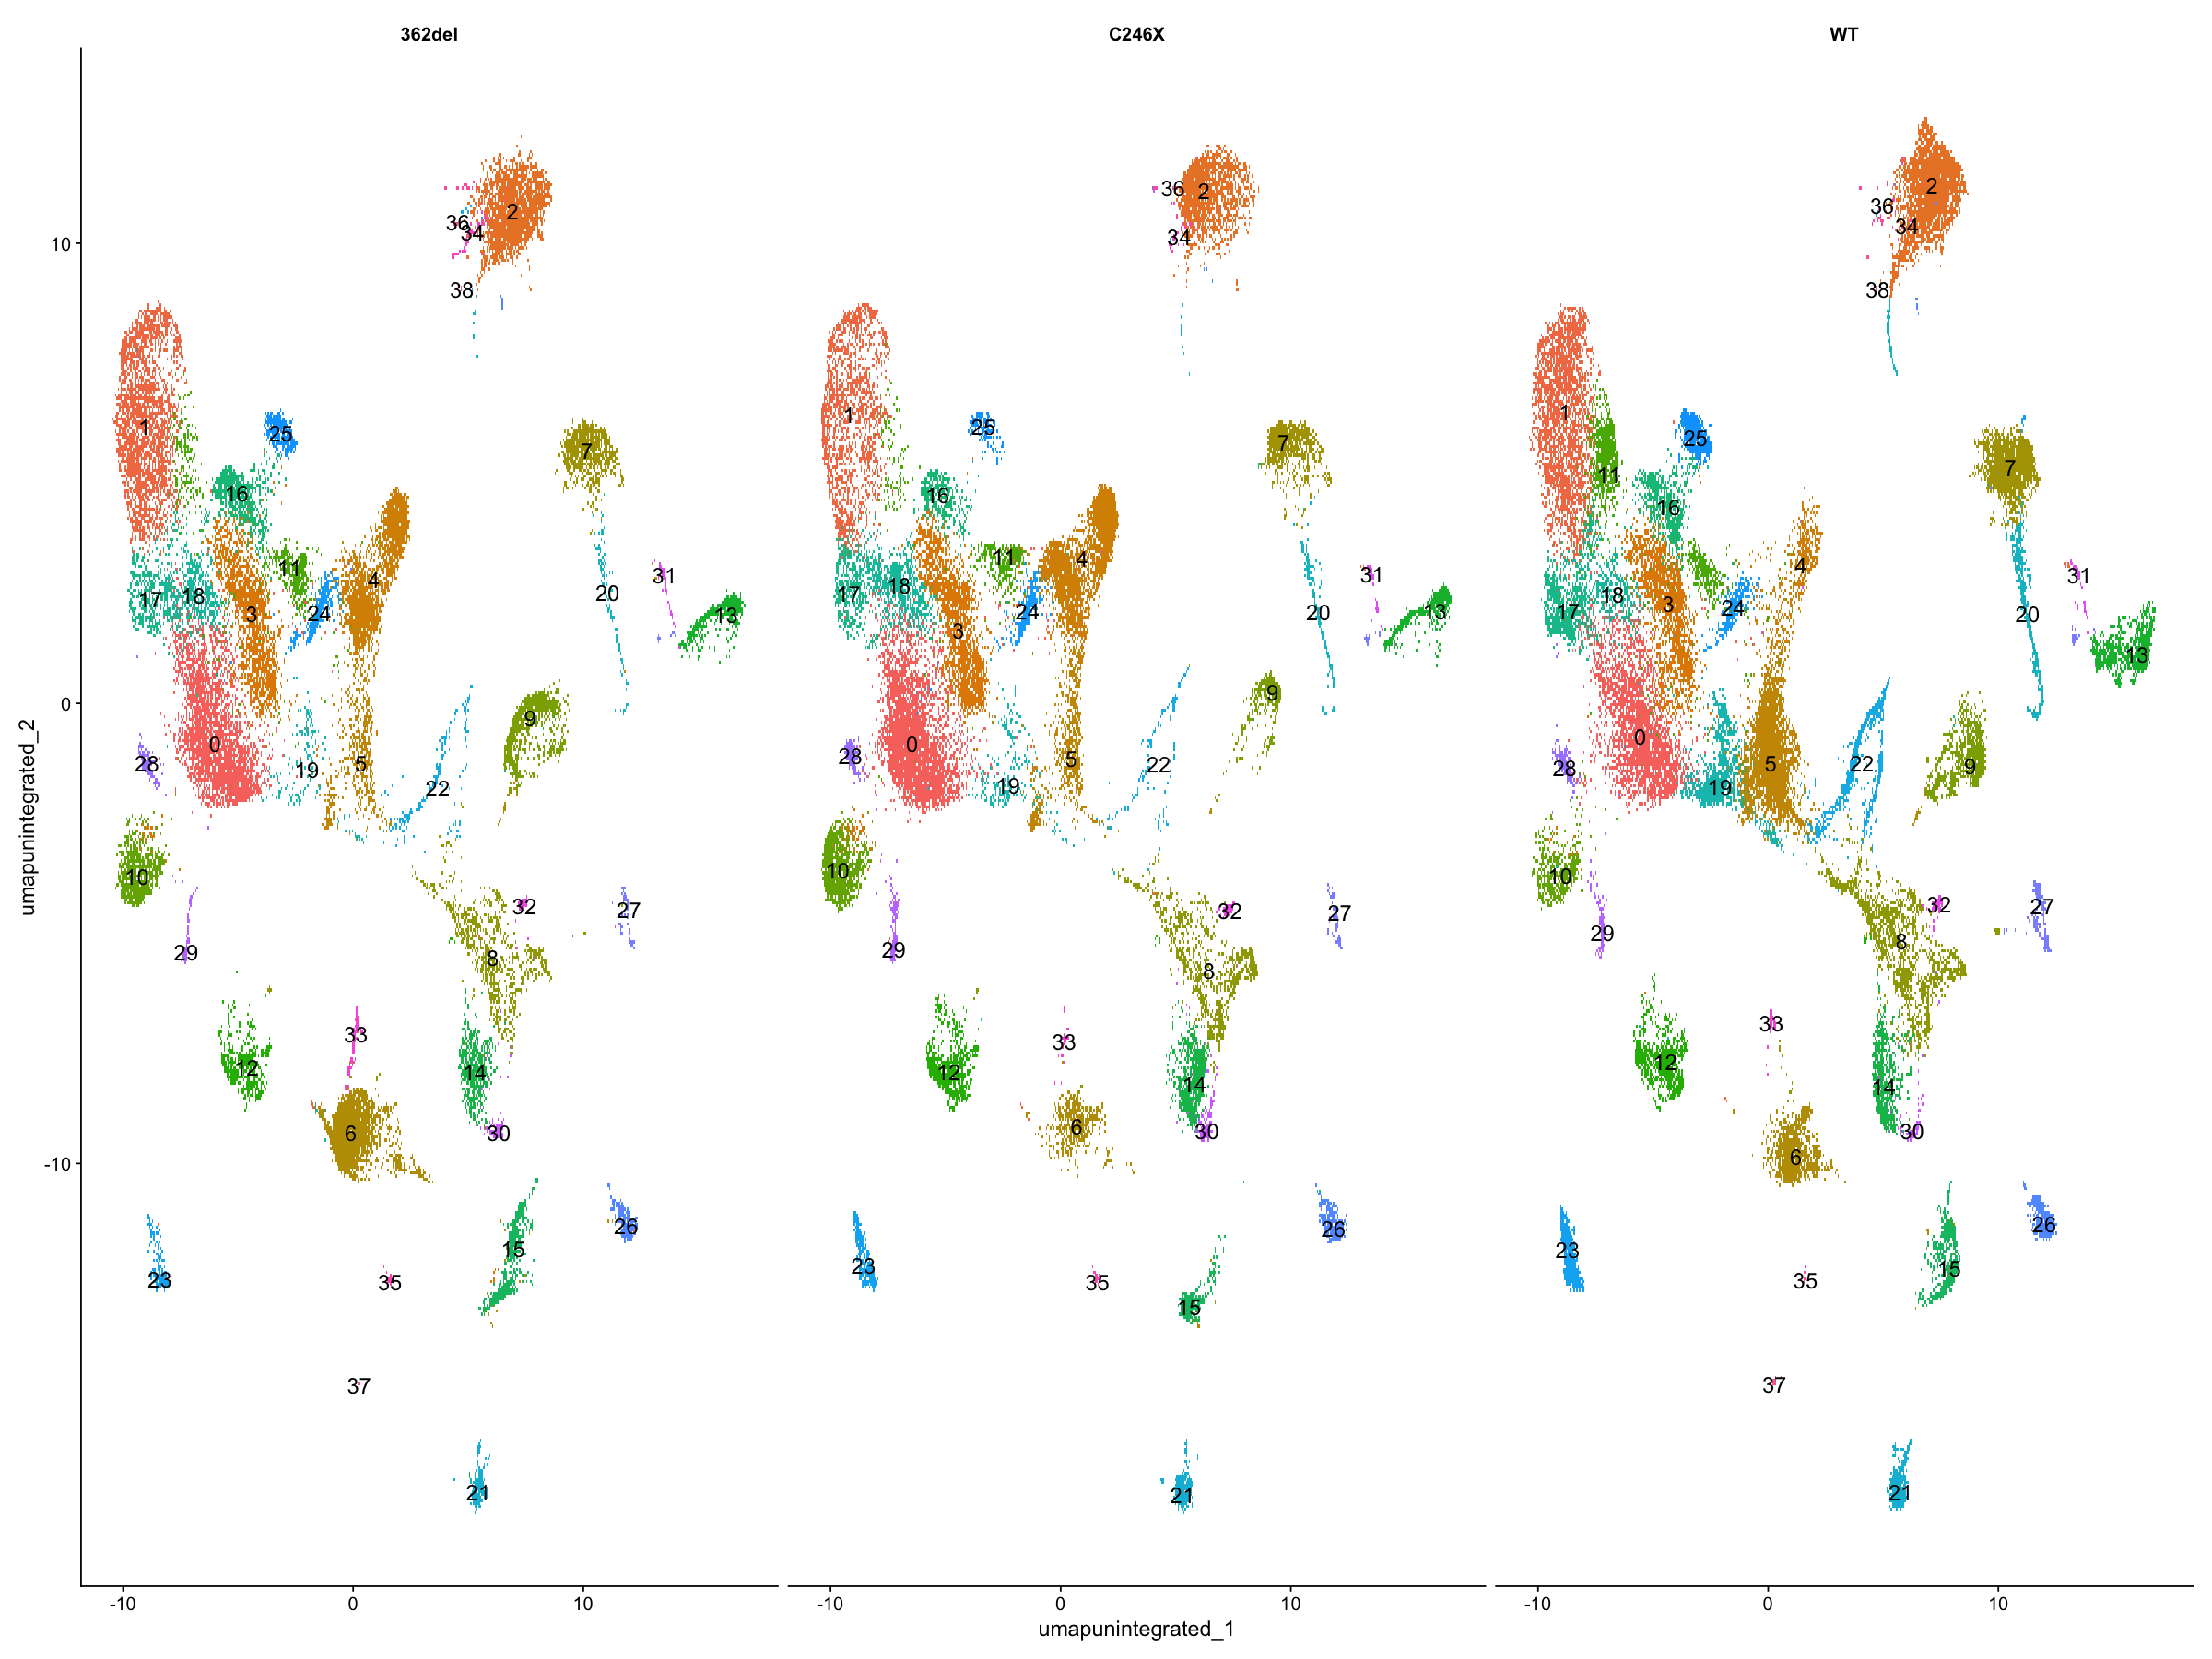

In [140]:
options(repr.plot.width=20, repr.plot.height=15)

DimPlot(LOG_NORM_NOVOALL_filt_umap, 
        label = TRUE, label.size = 5,
        split.by = "genotype") +
    NoLegend()

#### Boxplot (alternate visulisation to UMAP)
Number of genes (features) per cluster

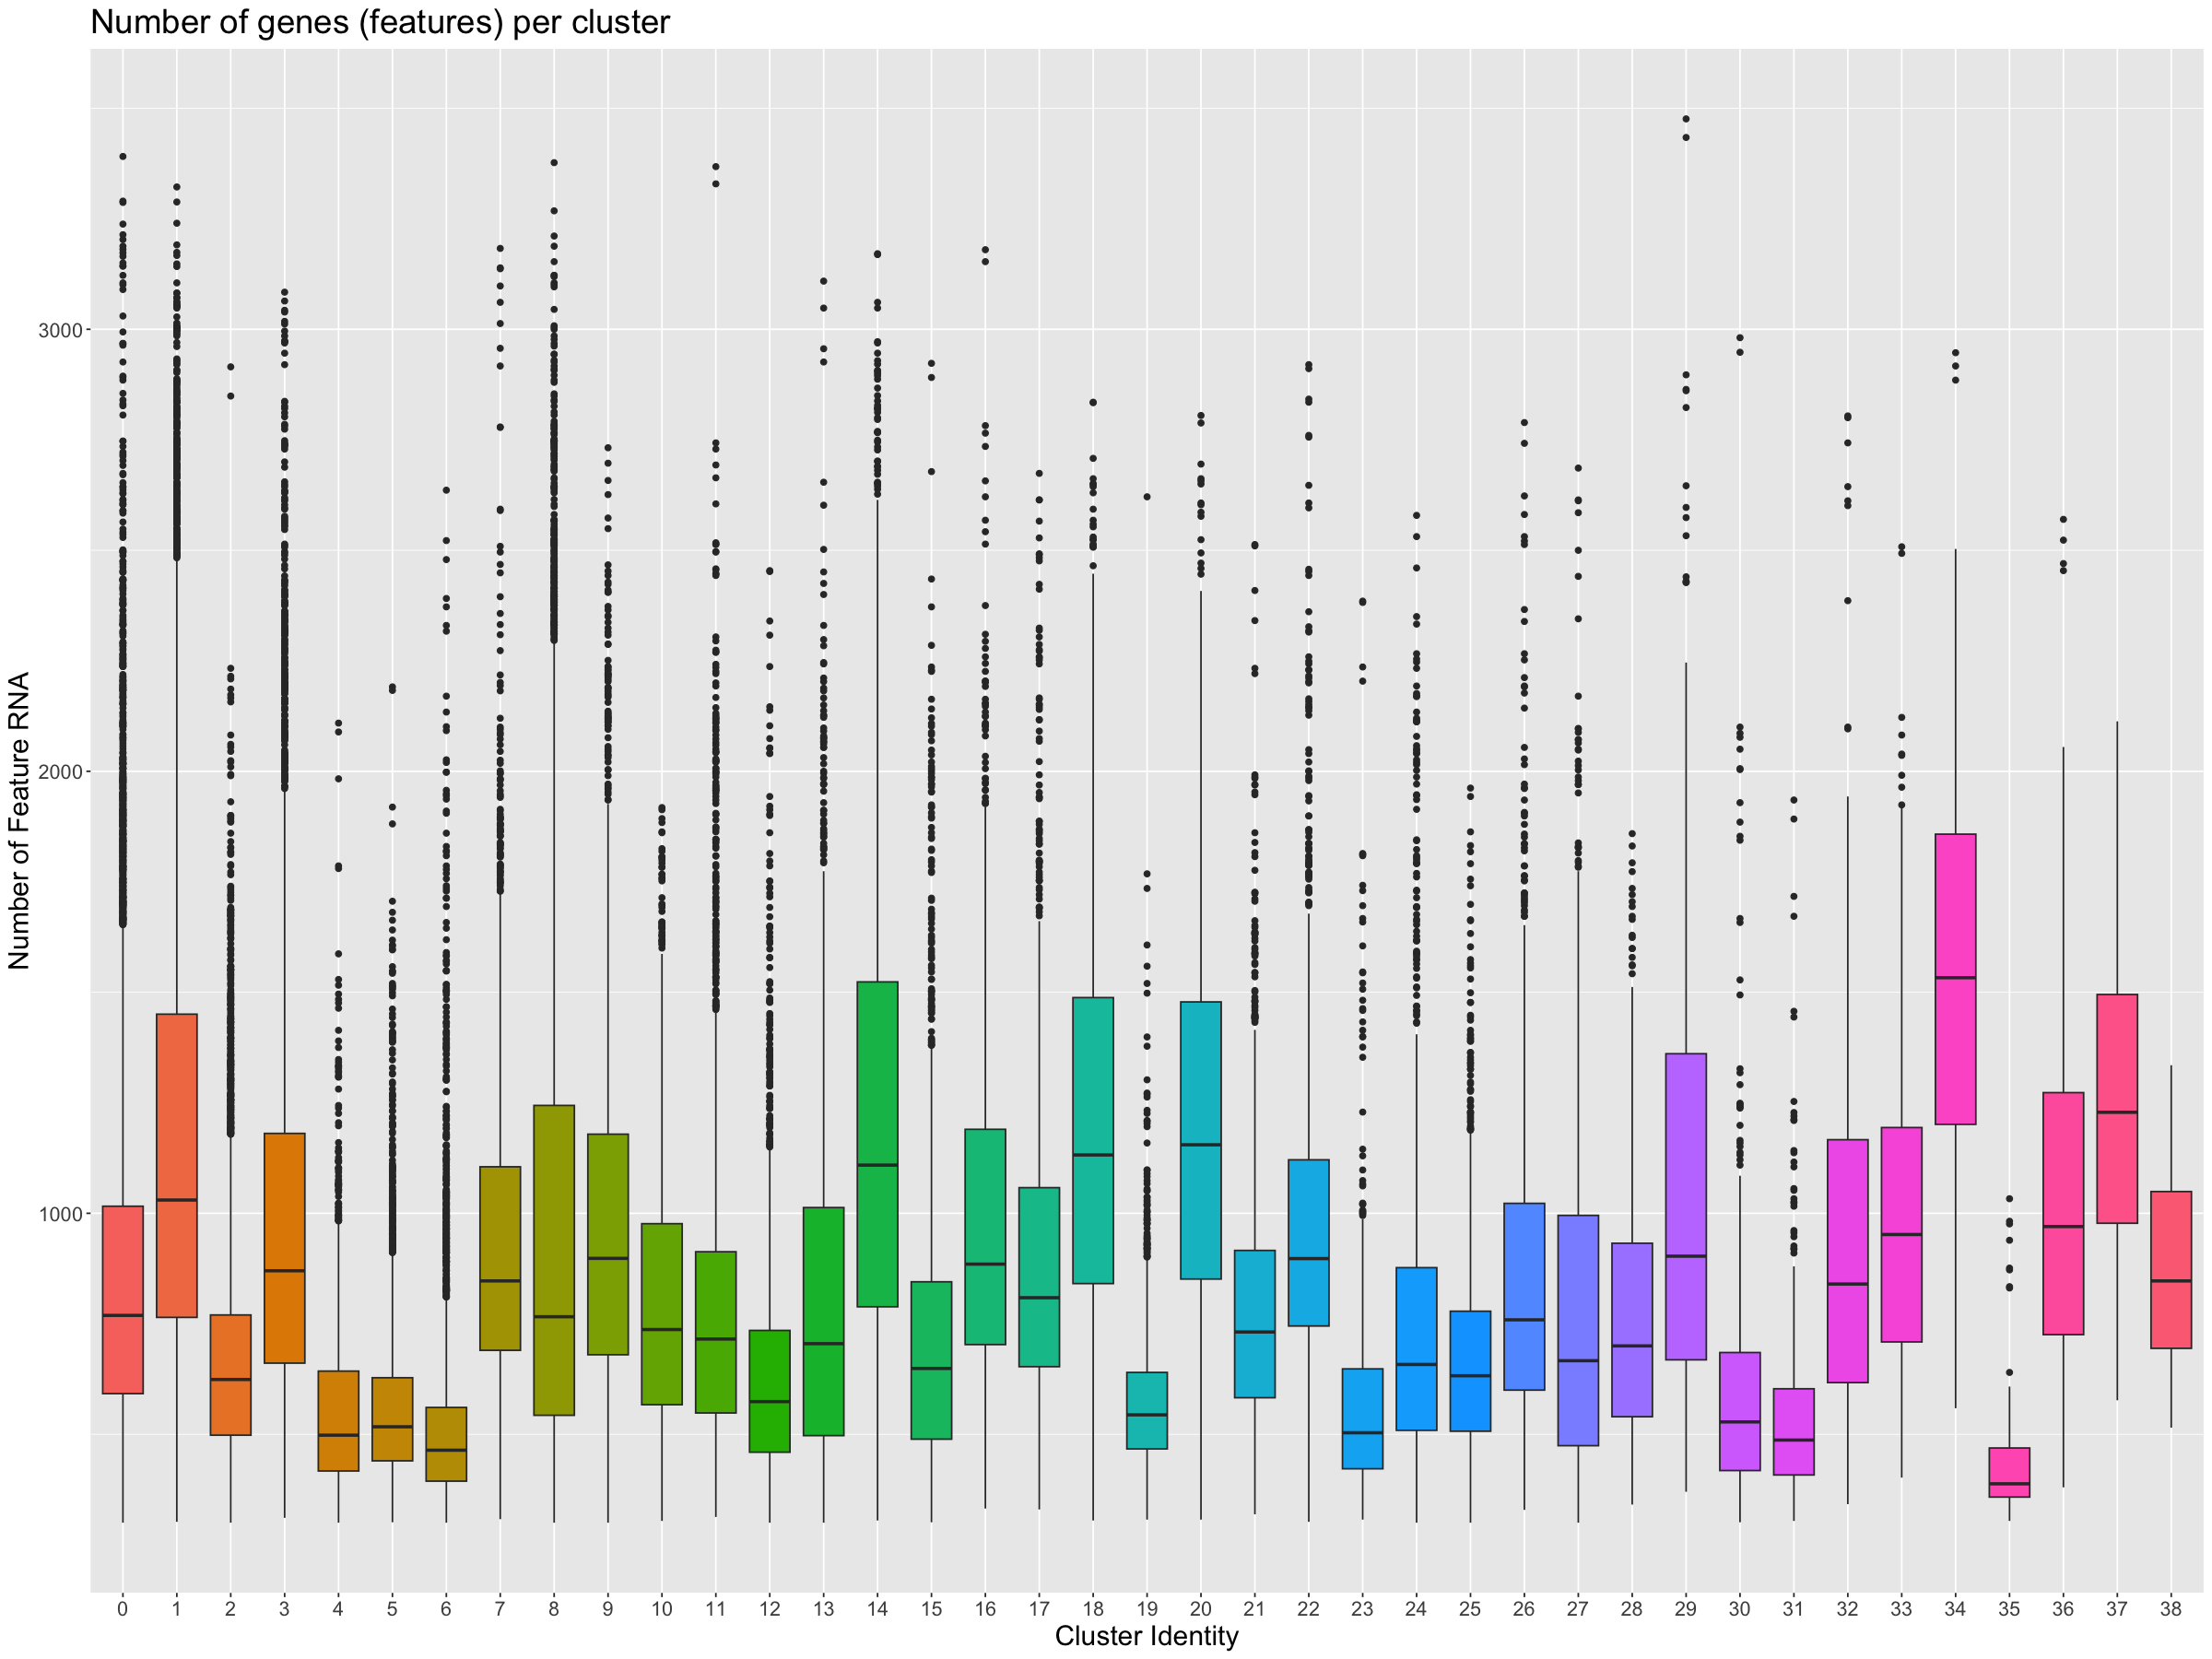

In [86]:
ggplot(LOG_NORM_NOVOALL_filt_umap@meta.data) +
    geom_boxplot(aes(x=seurat_clusters, y=nFeature_RNA, fill=seurat_clusters)) +
    labs(x = "Cluster Identity", y = "Number of Feature RNA") + 
    ggtitle("Number of genes (features) per cluster") + 
    theme(axis.text.x = element_text(vjust = 1, size = 13),
          axis.text.y = element_text(size = 13),
          axis.title.x = element_text(size = 18),
          axis.title.y = element_text(size = 18),
          plot.title = element_text(size = 22)) + 
    NoLegend()

### Looking at different resolutions
Note that this code will take ~5 minutes to run

In [147]:
# loop through the resolutions and run findclusters and umap for each value

dimplots = list()

for (value in res) {
    
    # find clusters
    clust_seurat = FindClusters(LOG_NORM_NOVOALL_filt_neigh, resolution = value)

    # run umap
    reduction_name = paste0("umap_unintegrated", value)
    umap_seurat = RunUMAP(clust_seurat, dims = 1:30, reduction = "pca", reduction.name = reduction_name)

    # dimension plot
    plot = DimPlot(umap_seurat, reduction = reduction_name, label = TRUE, label.size = 5) +  
            labs(color = "Cluster identities", title = paste0("\nCluster resolution = ", value)) + 
            theme(legend.text = element_text(size = 13),
                  legend.title = element_text(size = 15),
                  plot.title = element_text(size = 22, hjust = 0.5))
    
    dimplots[[paste0("plot", value)]] = plot
    
    }

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9737
Number of communities: 23
Elapsed time: 28 seconds


17:45:05 UMAP embedding parameters a = 0.9922 b = 1.112

17:45:05 Read 100963 rows and found 30 numeric columns

17:45:05 Using Annoy for neighbor search, n_neighbors = 30

17:45:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:45:11 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//RtmpEHMtiQ/filedbf37cbd686

17:45:11 Searching Annoy index using 1 thread, search_k = 3000

17:45:35 Annoy recall = 100%

17:45:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:45:37 Initializing from normalized Laplacian + noise (using RSpectra)

17:45:48 Commencing optimization for 200 epochs, with 4598144 positive edges

17:45:48 Using rng type: pcg

17:46:20 Optimization finished

Rasterizing points si

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9611
Number of communities: 28
Elapsed time: 27 seconds


17:46:47 UMAP embedding parameters a = 0.9922 b = 1.112

17:46:47 Read 100963 rows and found 30 numeric columns

17:46:47 Using Annoy for neighbor search, n_neighbors = 30

17:46:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:46:54 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//RtmpEHMtiQ/filedbf27711408

17:46:54 Searching Annoy index using 1 thread, search_k = 3000

17:47:18 Annoy recall = 100%

17:47:18 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:47:19 Initializing from normalized Laplacian + noise (using RSpectra)

17:47:31 Commencing optimization for 200 epochs, with 4598144 positive edges

17:47:31 Using rng type: pcg

17:48:02 Optimization finished

Rasterizing points si

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9506
Number of communities: 31
Elapsed time: 25 seconds


17:48:28 UMAP embedding parameters a = 0.9922 b = 1.112

17:48:28 Read 100963 rows and found 30 numeric columns

17:48:28 Using Annoy for neighbor search, n_neighbors = 30

17:48:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:48:35 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//RtmpEHMtiQ/filedbf70da2d72

17:48:35 Searching Annoy index using 1 thread, search_k = 3000

17:48:59 Annoy recall = 100%

17:48:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:49:00 Initializing from normalized Laplacian + noise (using RSpectra)

17:49:12 Commencing optimization for 200 epochs, with 4598144 positive edges

17:49:12 Using rng type: pcg

17:49:42 Optimization finished

Rasterizing points si

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9410
Number of communities: 39
Elapsed time: 28 seconds


17:50:11 UMAP embedding parameters a = 0.9922 b = 1.112

17:50:11 Read 100963 rows and found 30 numeric columns

17:50:11 Using Annoy for neighbor search, n_neighbors = 30

17:50:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:50:17 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//RtmpEHMtiQ/filedbf3ddd140

17:50:17 Searching Annoy index using 1 thread, search_k = 3000

17:50:39 Annoy recall = 100%

17:50:39 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:50:40 Initializing from normalized Laplacian + noise (using RSpectra)

17:50:52 Commencing optimization for 200 epochs, with 4598144 positive edges

17:50:52 Using rng type: pcg

17:51:22 Optimization finished

Rasterizing points sin

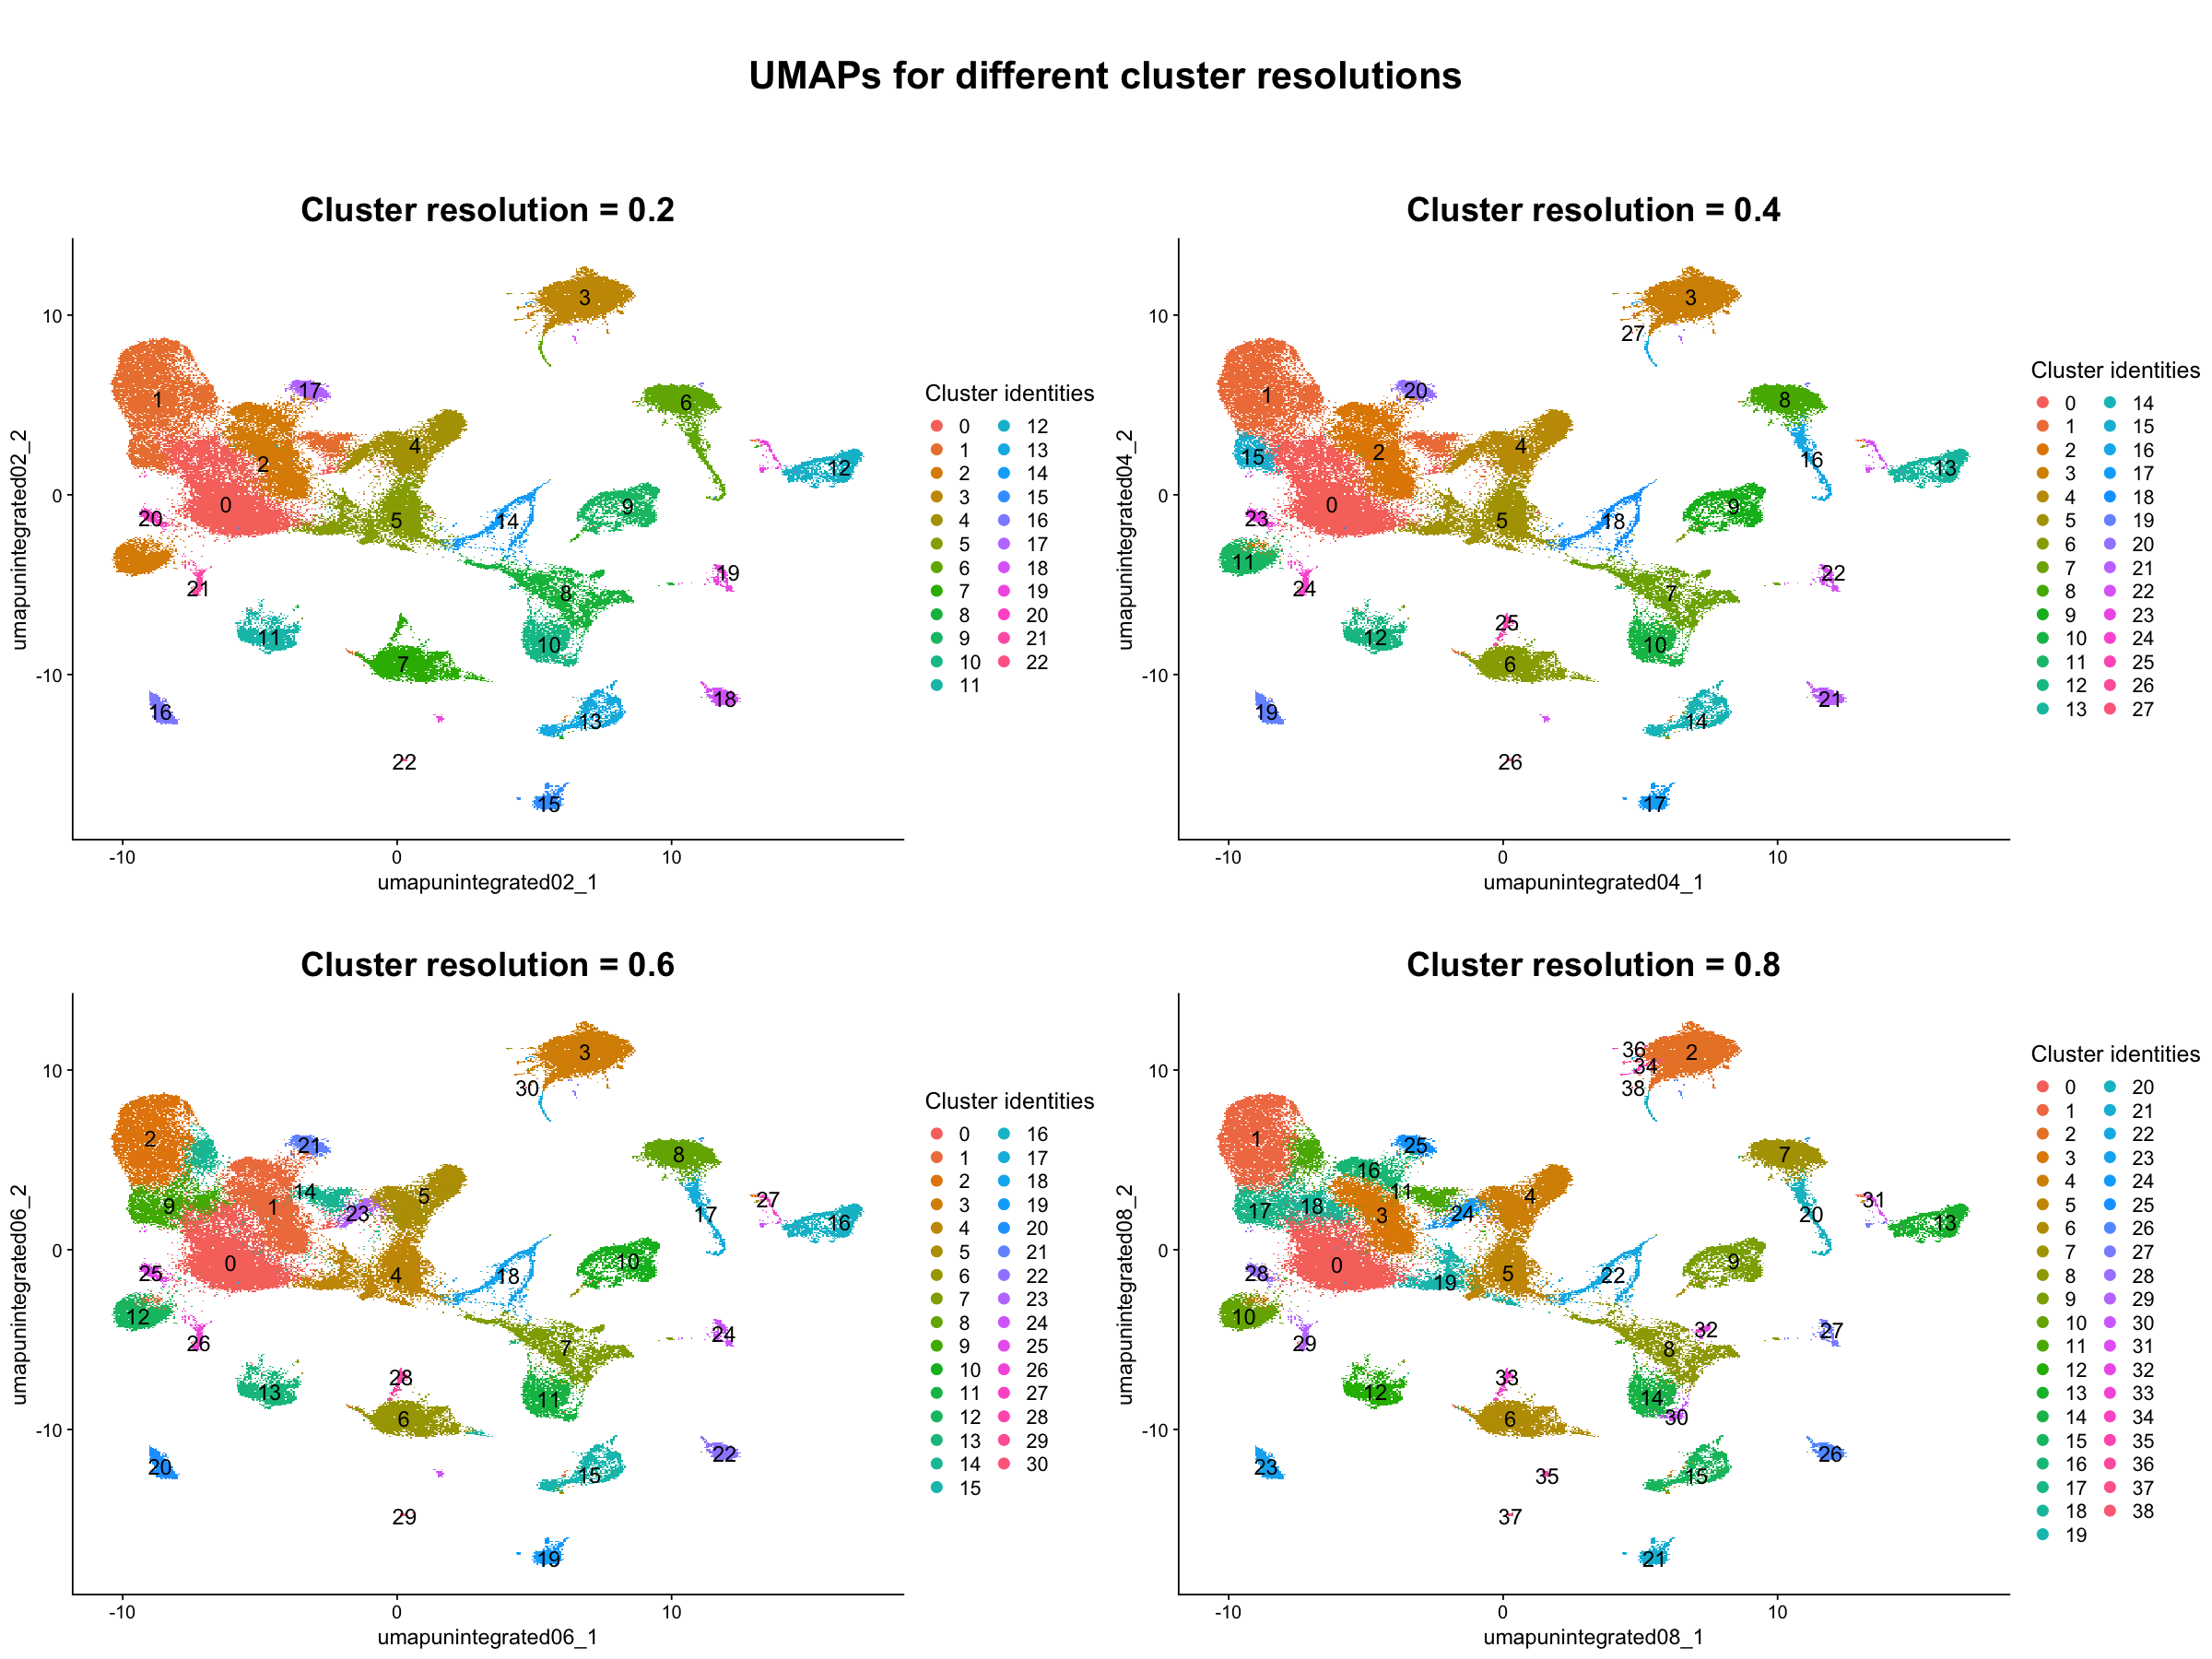

In [157]:
# Arrange plots in grid
grid.arrange(grobs = dimplots, ncol = ceiling(length(dimplots)/2),
             top = textGrob("\nUMAPs for different cluster resolutions\n", gp = gpar(fontsize = 25, fontface = "bold")))

## Feature plot of marker genes

Note that scale in the graph is the expression scale of the feature.

In [171]:
marker_genes = c("snap25a", "mbpa", "olig1", "sox10", "gfap", "gng8", "kiss1", "cd74a", "apoc1", "chgb", "prdx1", "slc6a5", "eomesa")

In [181]:
feature_plots = list()

for (gene in marker_genes) {
    cell_type = case_when(gene == "snap25a" ~ "Differentiated neurons: snap25a",
                          gene == "mbpa" ~ "Oligodendrocytes: mbpa",
                          gene == "olig1" ~ "Oligodendrocytes: olig1",
                          gene == "sox10" ~ "Oligodendrocytes: sox10",
                          gene == "gfap" ~ "\nGlia: gfap",
                          gene == "gng8" ~ "\nDorsal habenula: gng8",
                          gene == "kiss1" ~ "\nVentral habenula: kiss1",
                          gene == "cd74a" ~ "\nMicroglia & immune cells: cd74a", 
                          gene == "apoc1" ~ "\nMicroglia: apoc1",
                          gene == "chgb" ~ "\nHypothalamus: chgb",
                          gene == "prdx1" ~ "\nHypothalamus: prdx1",
                          gene == "slc6a5" ~ "\nHindbrain: slc6a5",
                          gene == "eomesa" ~ "\nForebrain: eomesa")

    plot = FeaturePlot(LOG_NORM_NOVOALL_filt_umap, features = gene) + labs(title = cell_type)

    feature_plots[[gene]] = plot

    }

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

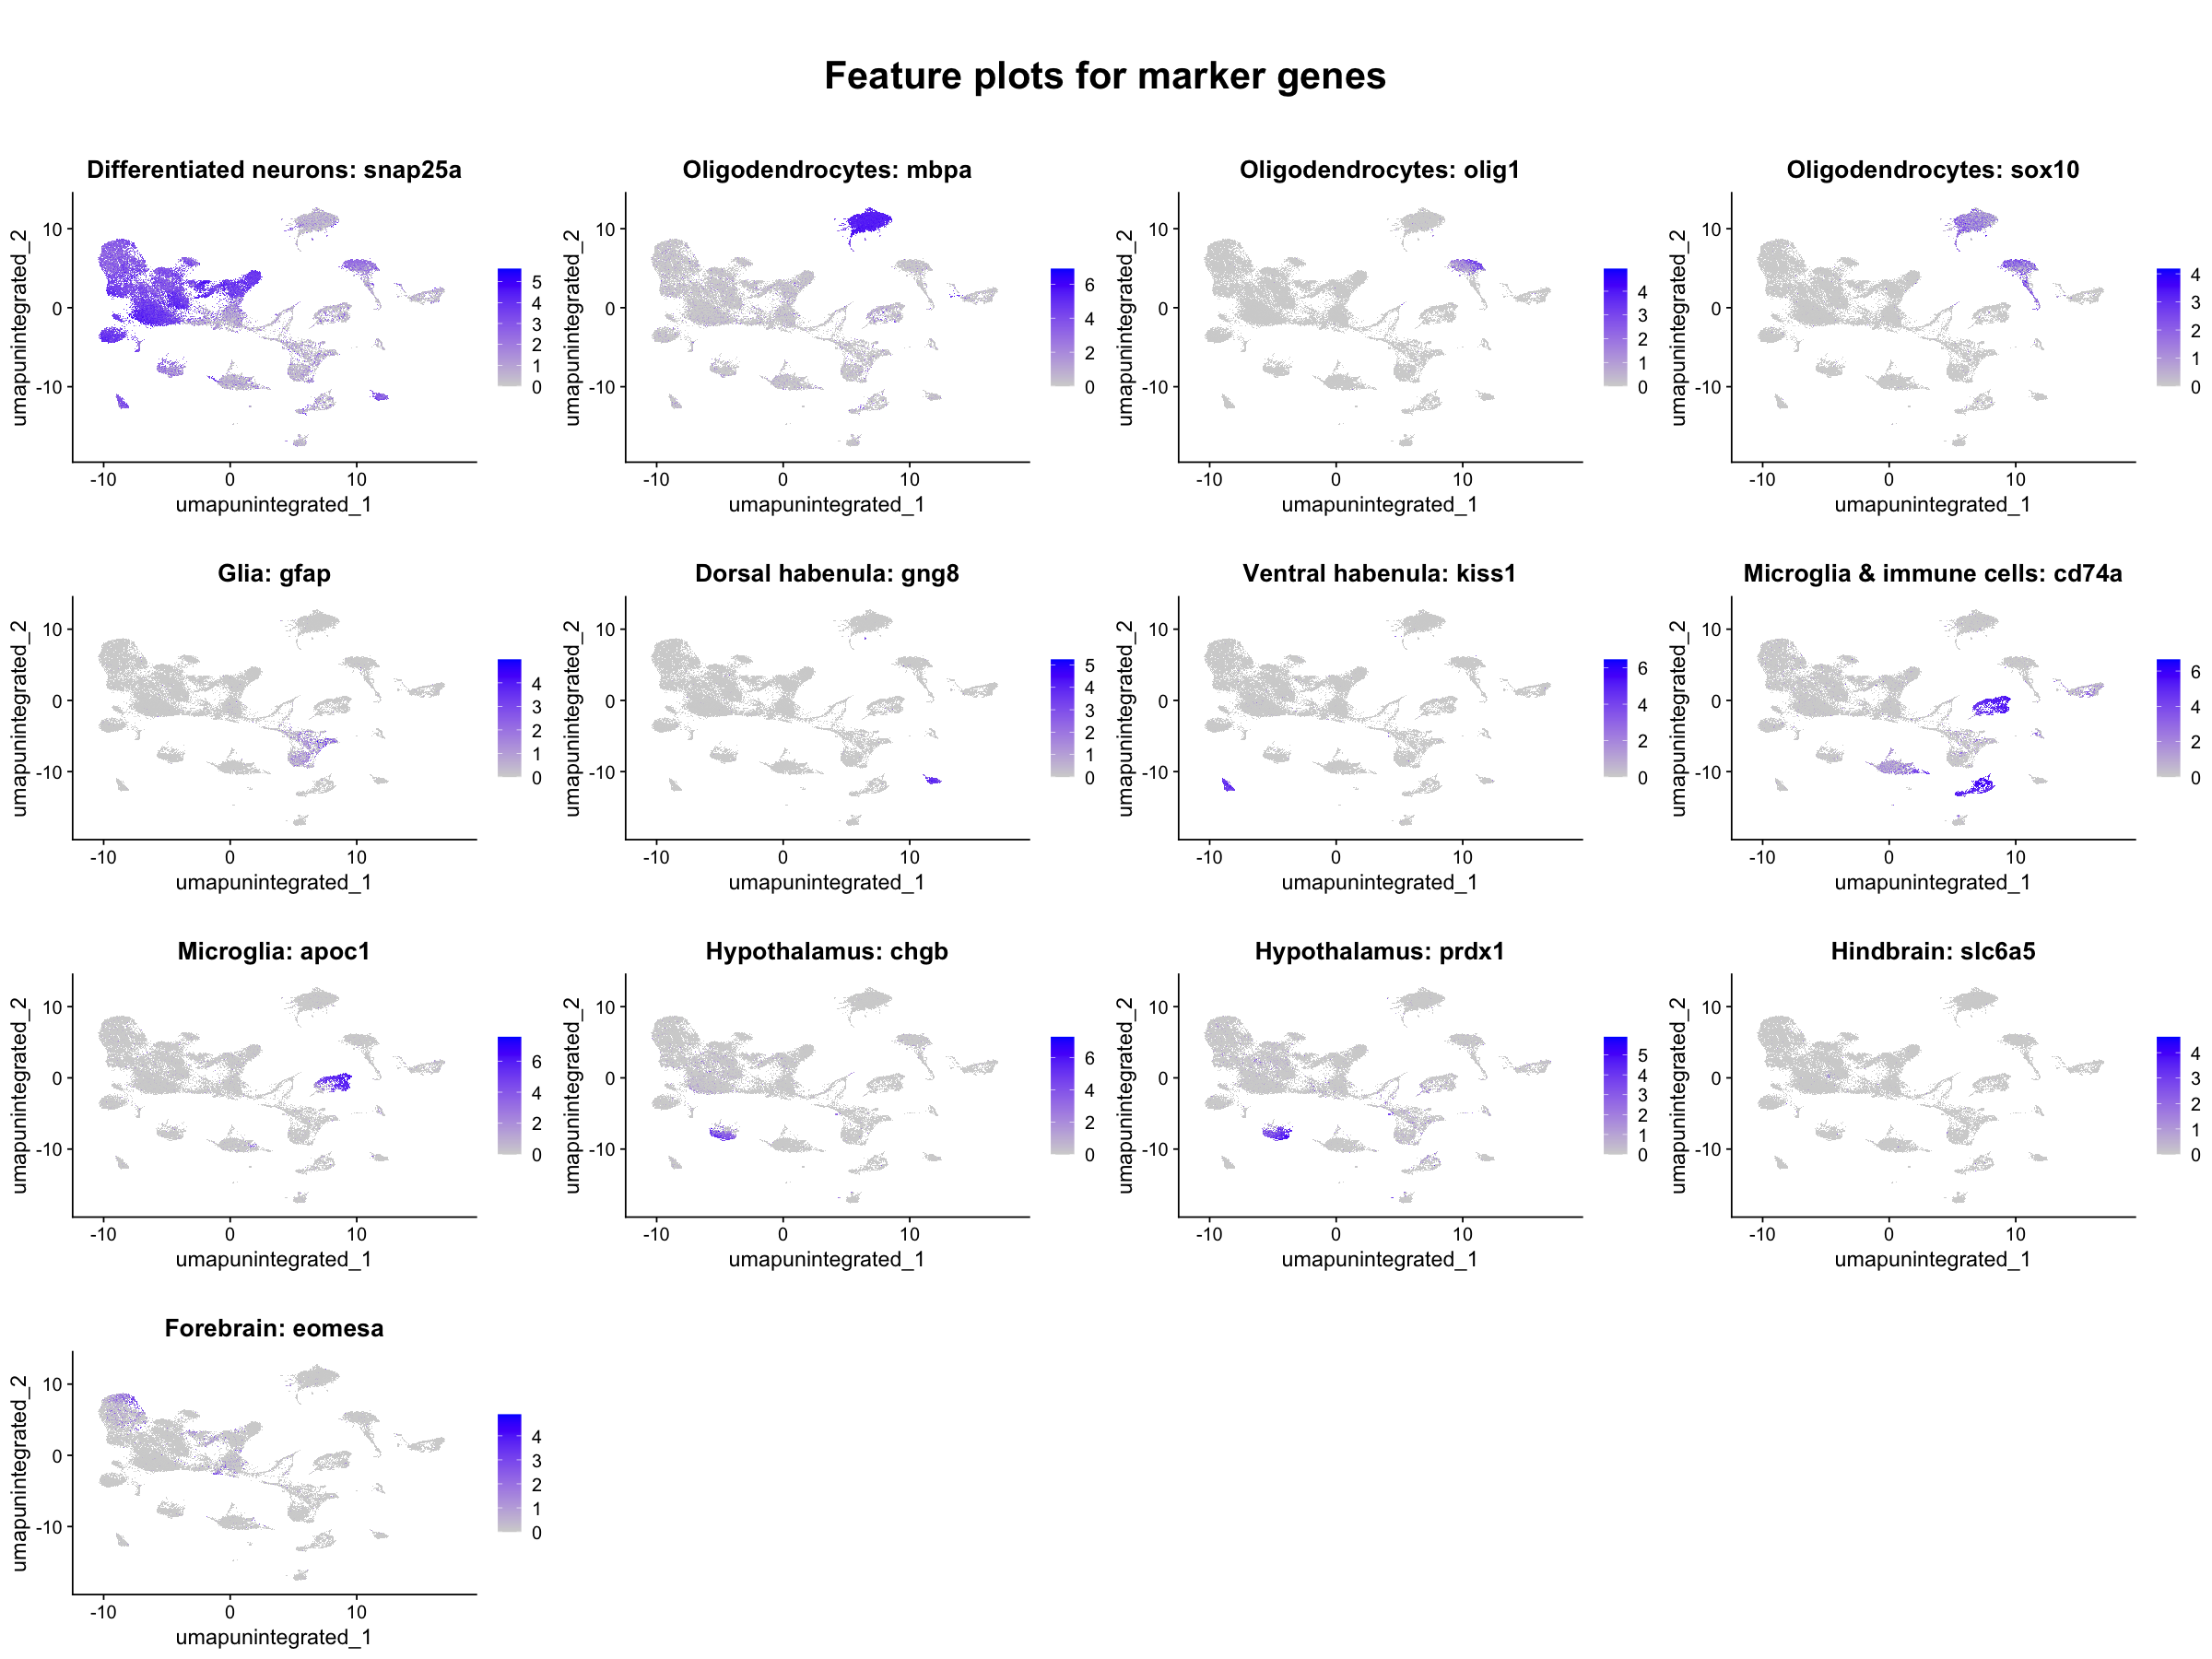

In [182]:
# Arrange plots in grid
grid.arrange(grobs = feature_plots, ncol = 4,
             top = textGrob("\nFeature plots for marker genes\n", gp = gpar(fontsize = 25, fontface = "bold")))

## Final clustering and UMAP
Finally, the user can choose the clustering resolution they want and obtain a final dimplot.

In [9]:
chosen_res = as.numeric(readline(prompt = "Please enter a resolution value: "))

Please enter a resolution value:  0.8


In [5]:
# find clusters
LOG_NORM_NOVOALL_filt_final = FindClusters(LOG_NORM_NOVOALL_filt_neigh, resolution = chosen_res)

# run umap
LOG_NORM_NOVOALL_filt_final = RunUMAP(LOG_NORM_NOVOALL_filt_final, dims = 1:30, reduction = "pca", 
                                      reduction.name = paste0("umap_unintegrated_", chosen_res))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 100963
Number of edges: 3560117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9410
Number of communities: 39
Elapsed time: 26 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:34:41 UMAP embedding parameters a = 0.9922 b = 1.112

20:34:41 Read 100963 rows and found 30 numeric columns

20:34:41 Using Annoy for neighbor search, n_neighbors = 30

20:34:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:34:47 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//RtmpUFx6b9/file61531abfd32

20:34:47 Searching Annoy index using 1 thread, search_k = 3000

20:35:09 Annoy recall = 100%

20:35:09 Commencing smooth kNN distance calibra

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



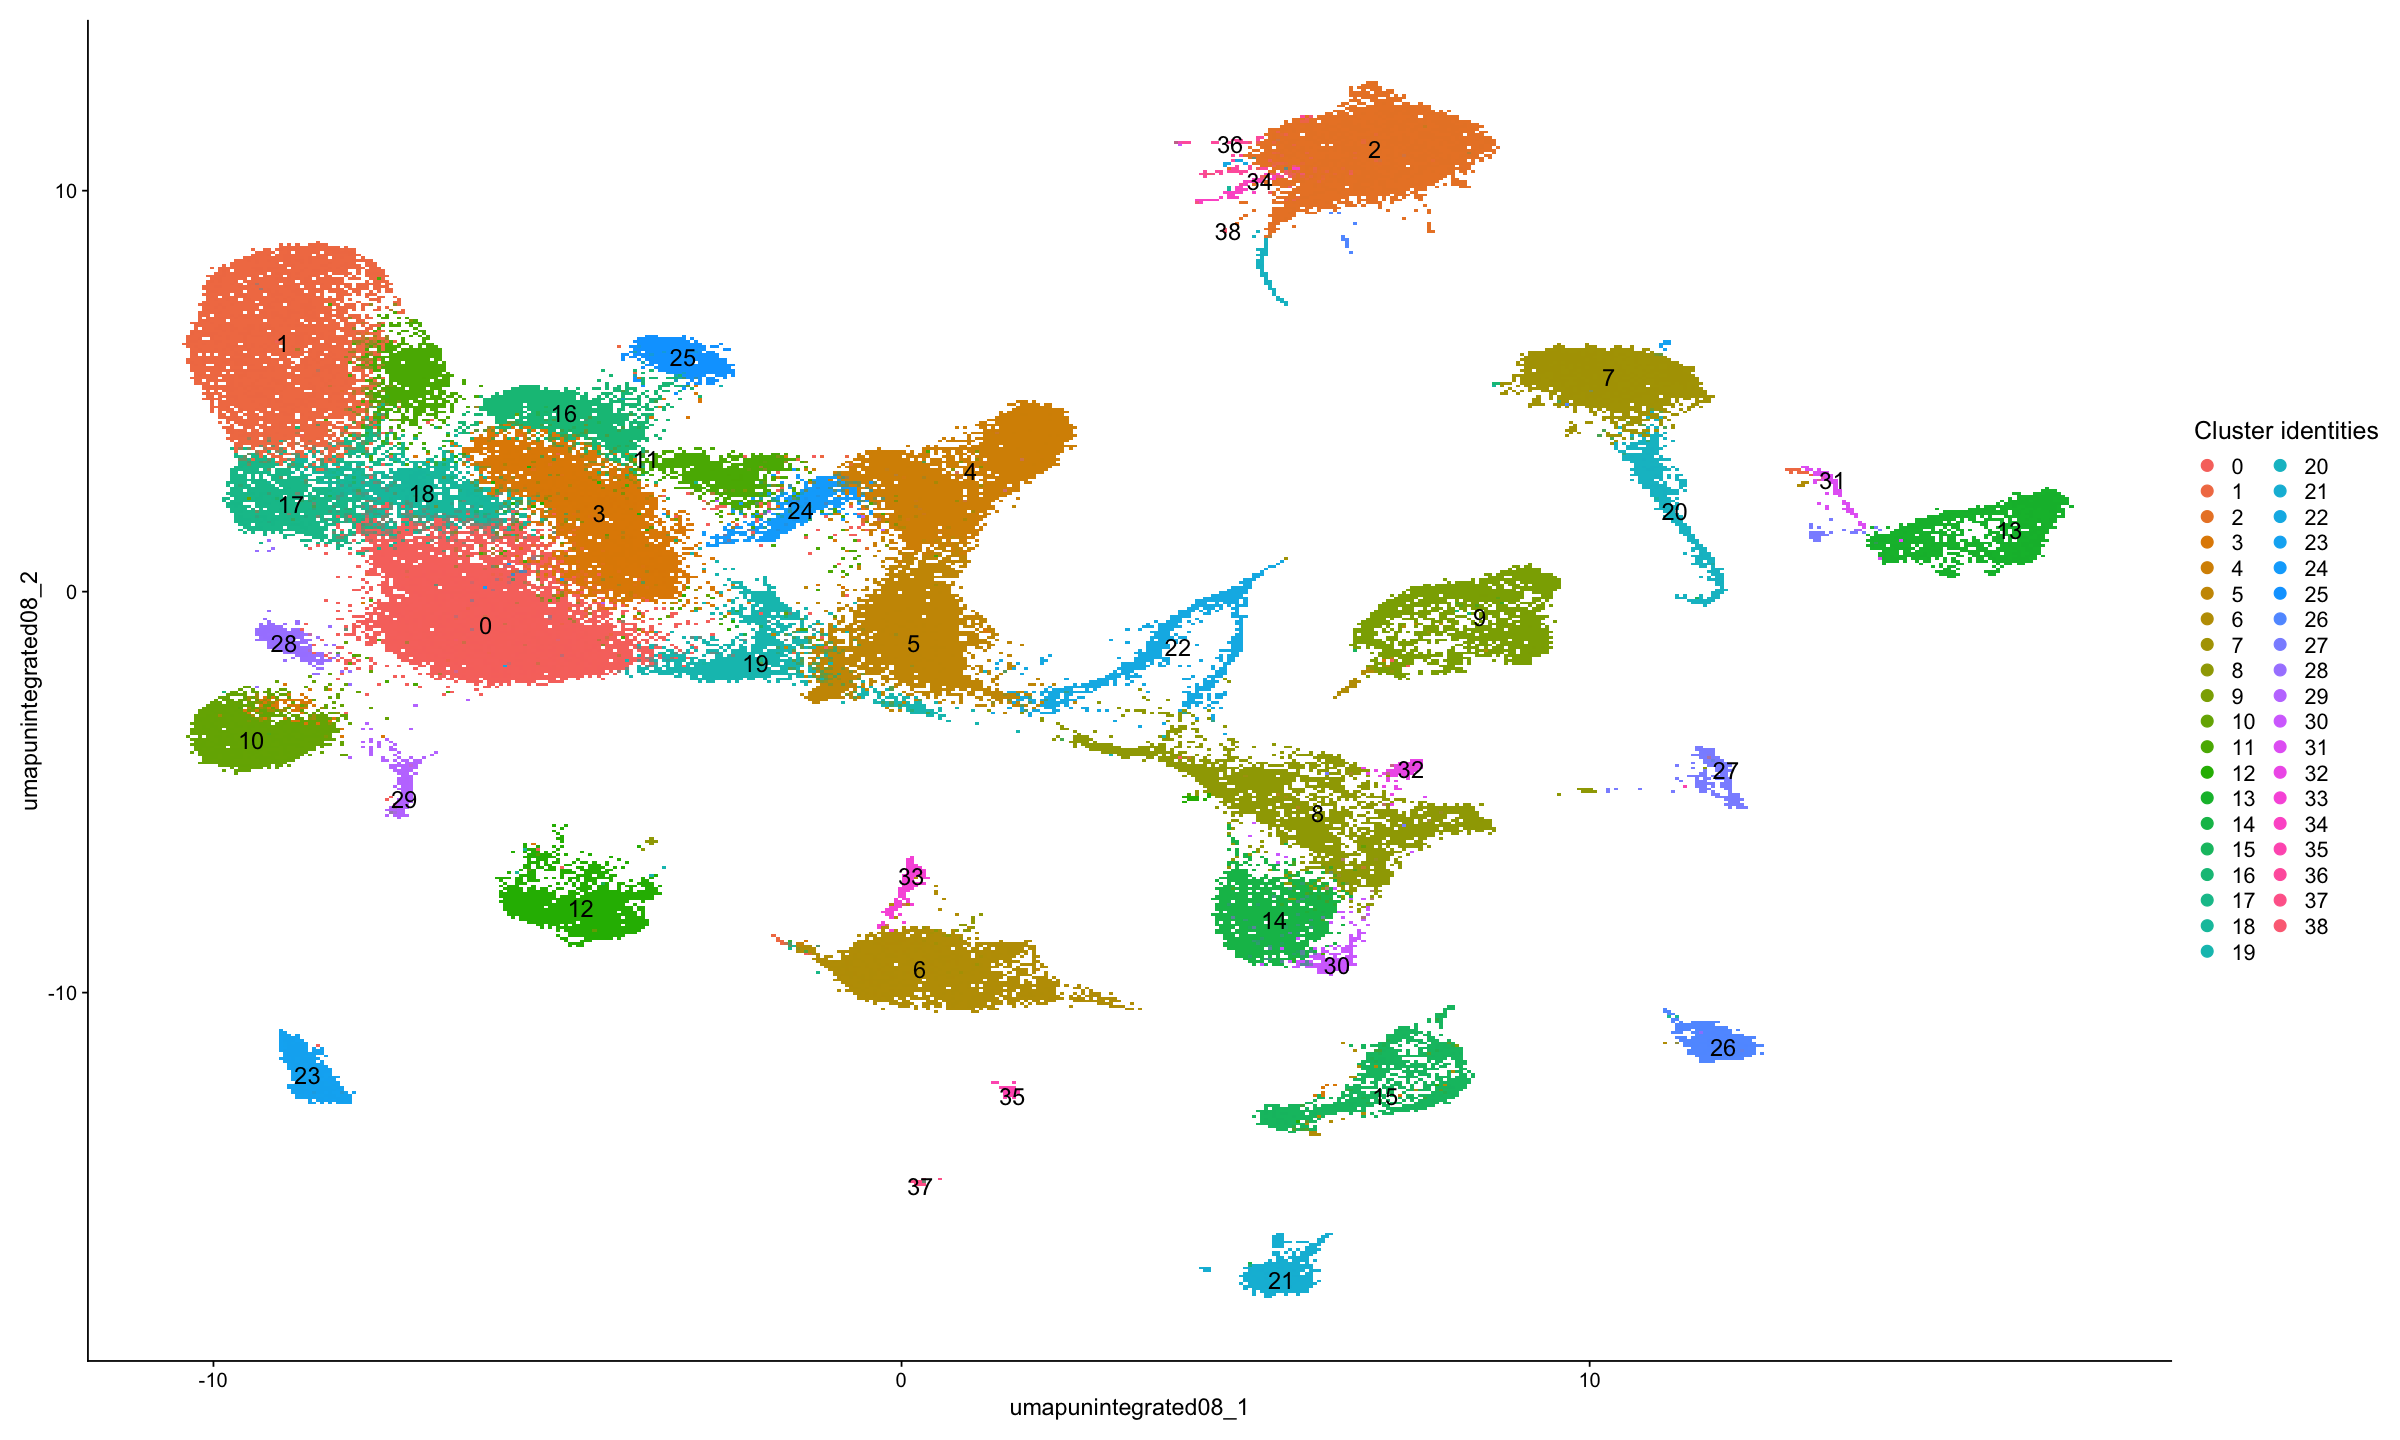

In [10]:
options(repr.plot.width=20, repr.plot.height=12)

# dimplot
DimPlot(LOG_NORM_NOVOALL_filt_final, reduction = paste0("umap_unintegrated_", chosen_res), label = TRUE, label.size = 5) +  
        labs(color = "Cluster identities") + 
        theme(legend.text = element_text(size = 13),
                  legend.title = element_text(size = 15),
                  plot.title = element_text(size = 22, hjust = 0.5))

### (OPTIONAL) Remove problematic clusters

In [3]:
# Filter out problematic clusters from LOG_NORM_NOVOALL_filt_final@meta.data
user_clusters_to_remove = readline(prompt = "Please enter the numbers of the clusters to remove, separated by a comma :")
clusters_to_remove = as.numeric(str_split_1(user_clusters_to_remove, ","))

Please enter the numbers of the clusters to remove, separated by a comma : 0,1,2,3,4,5,6,7,8,9


In [13]:
dim = as.numeric(readline(prompt = "Please enter dimension value for dims arg in FindNeighbors: "))

Please enter dimension value for dims arg in FindNeighbors:  30


In [10]:
LOG_NORM_NOVOALL_filt_final = subset(LOG_NORM_NOVOALL_filt_final, idents = clusters_to_remove, invert = TRUE) # if you want to keep these clusters, invert = FALSE

# run PCA
LOG_NORM_NOVOALL_filt_final = RunPCA(LOG_NORM_NOVOALL_filt_final)

# find neighbours 
LOG_NORM_NOVOALL_filt_final <- FindNeighbors(LOG_NORM_NOVOALL_filt_final, dims = 1:dim, reduction = "pca")

# find clusters
LOG_NORM_NOVOALL_filt_final = FindClusters(LOG_NORM_NOVOALL_filt_final, resolution = chosen_res)

# run umap 
LOG_NORM_NOVOALL_filt_final = RunUMAP(LOG_NORM_NOVOALL_filt_final, dims = 1:30, reduction = "pca", reduction.name = "umap_final")

Warning message:
“The following 2 features requested have zero variance; running reduction without them: dclk1b, si:ch211-277c7.6”
PC_ 1 
Positive:  tmsb2, egr4, zgc:122979, syt1a, atp1b1b, scg2b, pcp4a, nrgna, elavl4, stmn4l 
	   phactr3b, adgrb1b, rgs16, snap25b, kctd4, itm2cb, camk2a, adcyap1b, rasd2, gap43 
	   gad2, nrn1a, chga, uchl1, cplx2l, nell2b, vgf, rergla, rtn4rl2a, si:dkeyp-72h1.1 
Negative:  zgc:158423, anxa2a, etv2, krt18a.1, flt1, icn, krt94, cldn5b, socs3a, sox7 
	   akap12b, kdrl, cxcl12b, s100a10b, sparc, si:ch211-145b13.6, ch25h, klf2a, rgcc, krt8 
	   si:dkey-126g1.9, hopx, egfl7, gstp1, il13ra1, cdc42ep5, tagln2, si:ch211-156j16.1, rbpms2b, cnn2 
PC_ 2 
Positive:  fgfbp3, mfge8a, apof, si:dkey-238o13.4, msrb2, crtac1a, slc1a2b, cyp4t8, aqp1a.1, atp1a1b 
	   fgfr2, cd81b, eno1b, atp1b4, slc6a11b, ucp1, slc4a4a, cx43, dio2, ptn 
	   robo4, hspb15, rhbg, cyp26b1, zgc:101744, gpm6bb, ptgdsb.2, si:dkey-85k7.7, ppap2d, elovl2 
Negative:  tmsb4x, etv2, krt18a.1, anxa2a,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 37260
Number of edges: 1463864

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 33
Elapsed time: 4 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:15:43 UMAP embedding parameters a = 0.9922 b = 1.112

21:15:43 Read 37260 rows and found 30 numeric columns

21:15:43 Using Annoy for neighbor search, n_neighbors = 30

21:15:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:15:45 Writing NN index file to temp file /var/folders/7b/snpms3c90nqg721sdk5lczdw0000gn/T//Rtmp9kq534/file7a24de954a0

21:15:45 Searching Annoy index using 1 thread, search_k = 3000

21:15:52 Annoy recall = 100%

21:15:52 Commencing smooth kNN distance calibrat

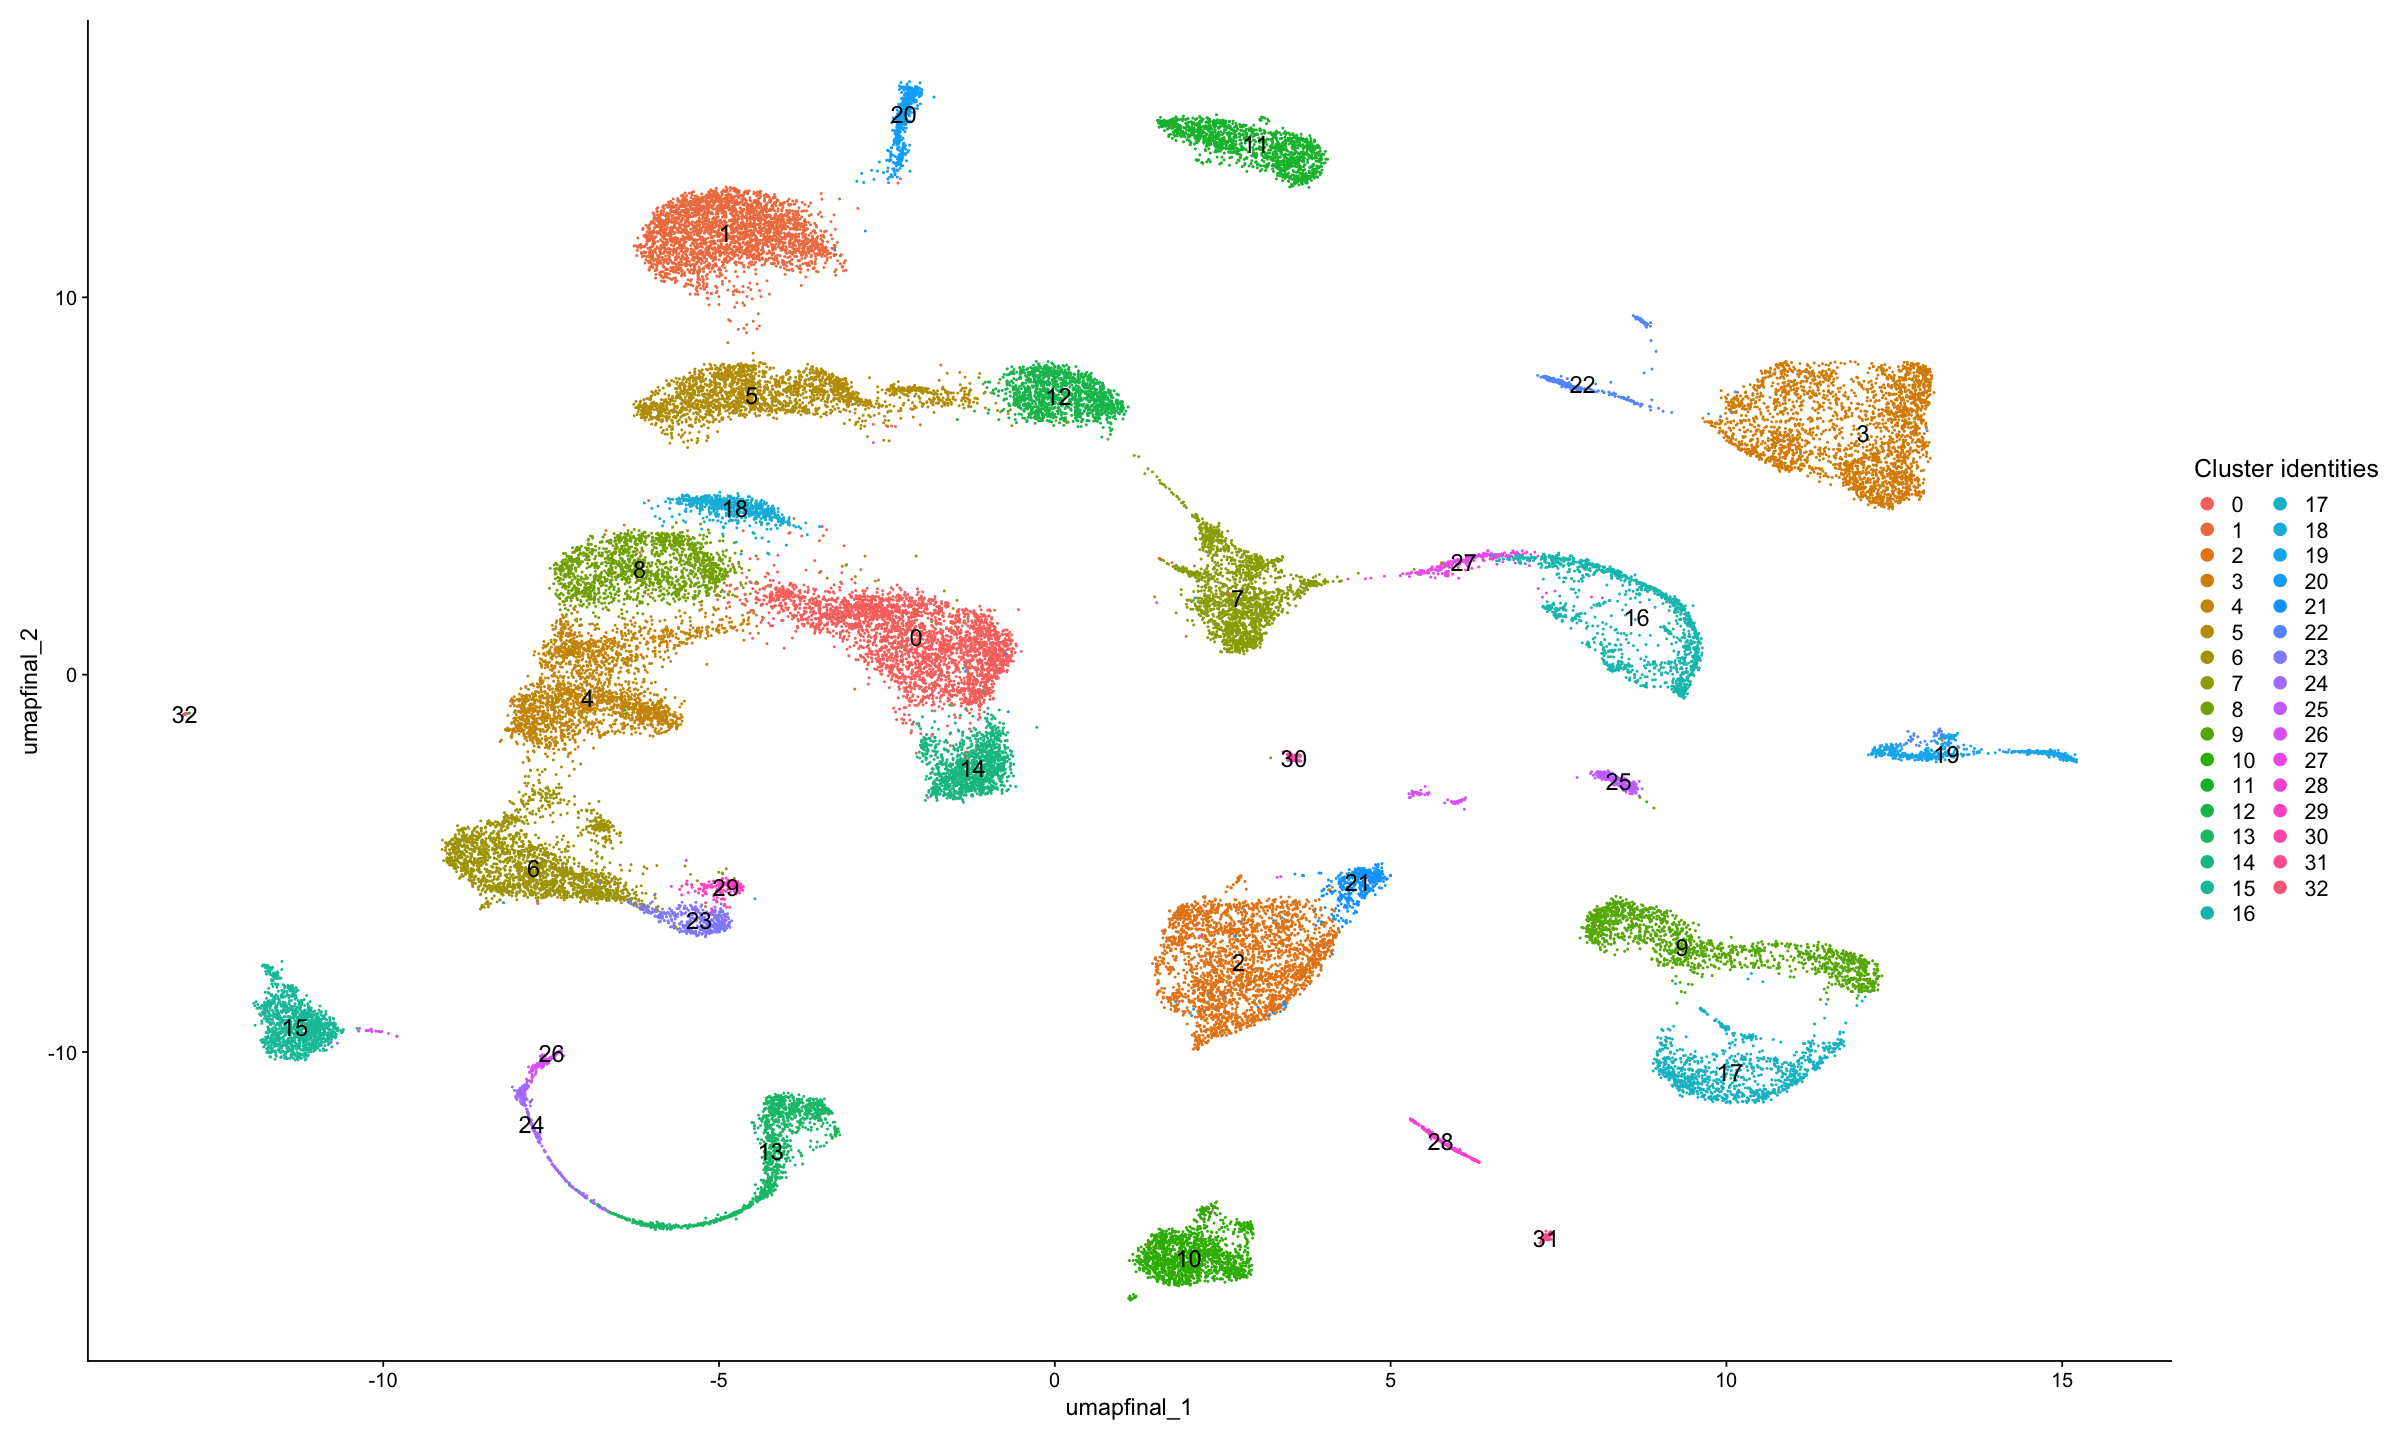

In [12]:
options(repr.plot.width=20, repr.plot.height=12)

# final dimplot
DimPlot(LOG_NORM_NOVOALL_filt_final, reduction = "umap_final", label = TRUE, label.size = 5) +  
        labs(color = "Cluster identities") + 
        theme(legend.text = element_text(size = 13),
                  legend.title = element_text(size = 15),
                  plot.title = element_text(size = 22, hjust = 0.5))

## Save final file

In [12]:
# save
user_dir6 = readline(prompt = "Please enter file directory to save LOG_NORM_NOVOALL_filt_final: ")
saveRDS(LOG_NORM_NOVOALL_filt_final, user_dir6)

Please enter file directory to save LOG_NORM_NOVOALL_filt_final:  ../data_files/LOG_NORM_NOVOALL_filt_final.rds
